In [1]:
!pip install antropy

In [8]:
import pandas as pd
from pathlib import Path

def merge_physiological_data(base_path):
    all_data = []
    base_path = Path(base_path)
    
    for condition in ['hypoxia', 'regular']:
        condition_path = base_path / condition
        
        if not condition_path.exists():
            continue
            
        for group_dir in condition_path.iterdir():
            if not group_dir.is_dir():
                continue
                
            group_id = group_dir.name
            bpm_path = group_dir / 'bpm'
            uterus_path = group_dir / 'uterus'
            
            if not (bpm_path.exists() and uterus_path.exists()):
                continue
            
            bpm_files = {f.stem: f for f in bpm_path.glob('*.csv')}
            uterus_files = {f.stem: f for f in uterus_path.glob('*.csv')}
            
            for base_name in bpm_files.keys(): # [_1, _3]
                uterus_base = base_name.replace('_1', '_2').replace('_3', '_4') # [_1, _3] -> [_2, _4]
                
                if uterus_base in uterus_files:
                    bpm_df = pd.read_csv(bpm_files[base_name])
                    bpm_df.columns = ['time_sec', 'bpm']
                    uterus_df = pd.read_csv(uterus_files[uterus_base])
                    uterus_df.columns = ['time_sec', 'uterus']
                    merged = pd.merge(bpm_df, uterus_df, on='time_sec', how='inner')
                    merged['group_id'] = group_id
                    merged['sequence_id'] = base_name
                    merged['target'] = condition
                    merged['timestamp'] = merged['time_sec']
                    merged = merged[['timestamp', 'group_id', 'sequence_id', 'bpm', 'uterus', 'target']]
                    all_data.append(merged)
                    # print(f"Processed: {condition}/{group_id}/{base_name}")
                        
    if all_data:
        final_df = pd.concat(all_data, ignore_index=True)
        return final_df
    else:
        return pd.DataFrame()

In [13]:
df = merge_physiological_data('/kaggle/input/govno_ot_itelmi')

regular / 1 / 20250901-01000001_1
  Точек: 1908, Аномалий: 285, Время: 0.25 мс


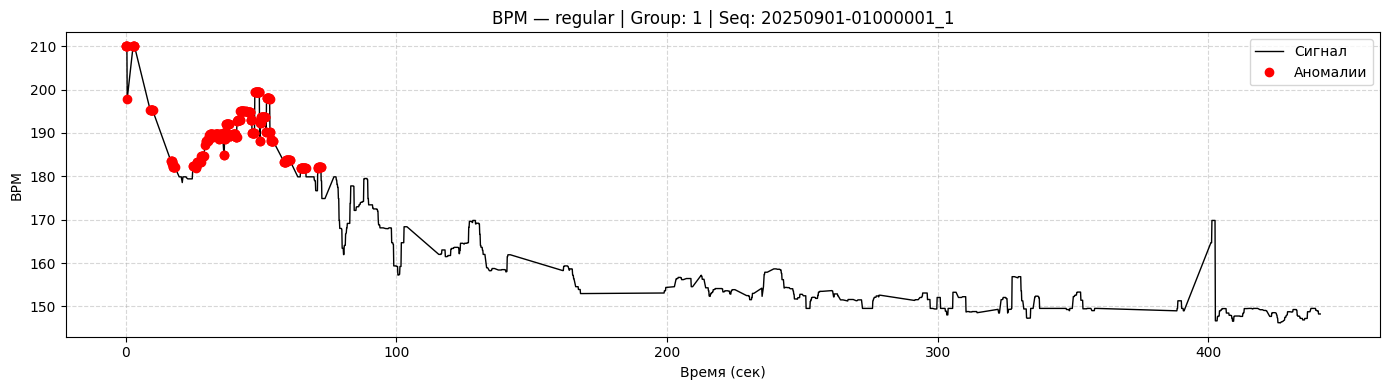

regular / 1 / 20250901-01000002_1
  Точек: 4828, Аномалий: 120, Время: 0.32 мс


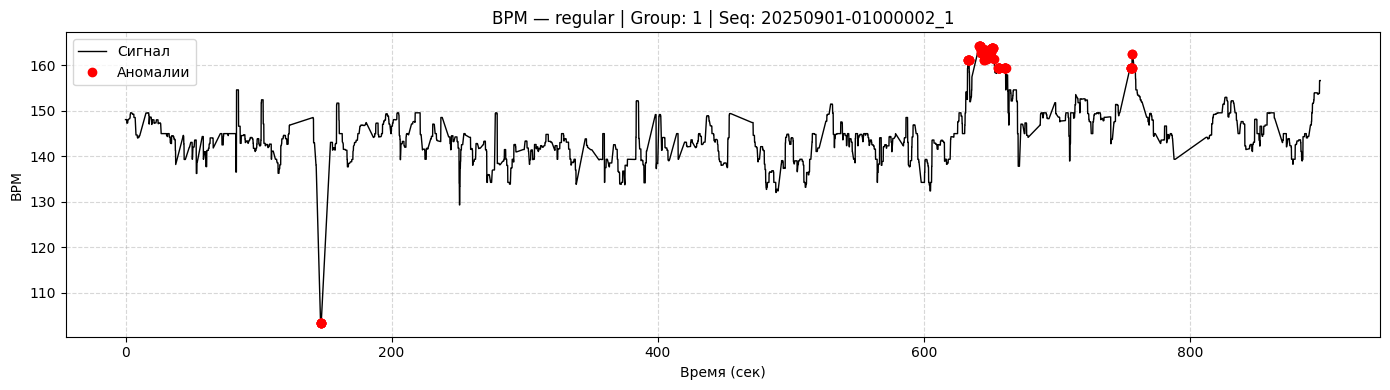

regular / 1 / 20250901-01000003_1
  Точек: 980, Аномалий: 1, Время: 0.46 мс


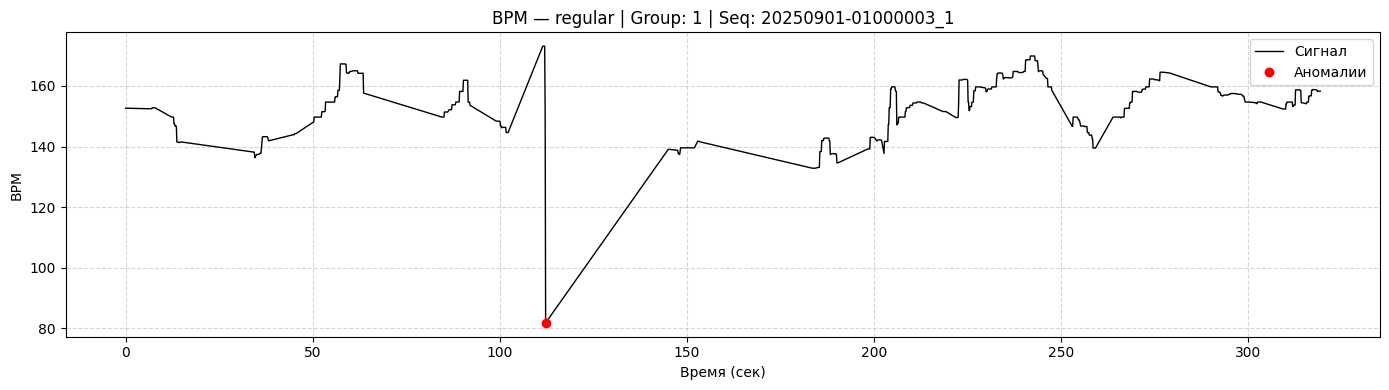

regular / 1 / 20250901-01000003_3
  Точек: 531, Аномалий: 5, Время: 0.35 мс


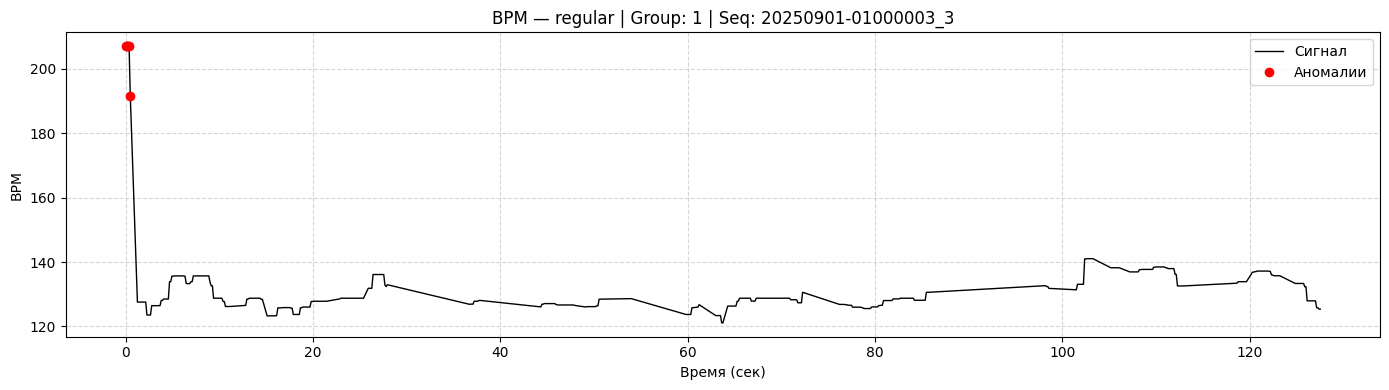

regular / 1 / 20250901-01000004_1
  Точек: 3467, Аномалий: 7, Время: 0.34 мс


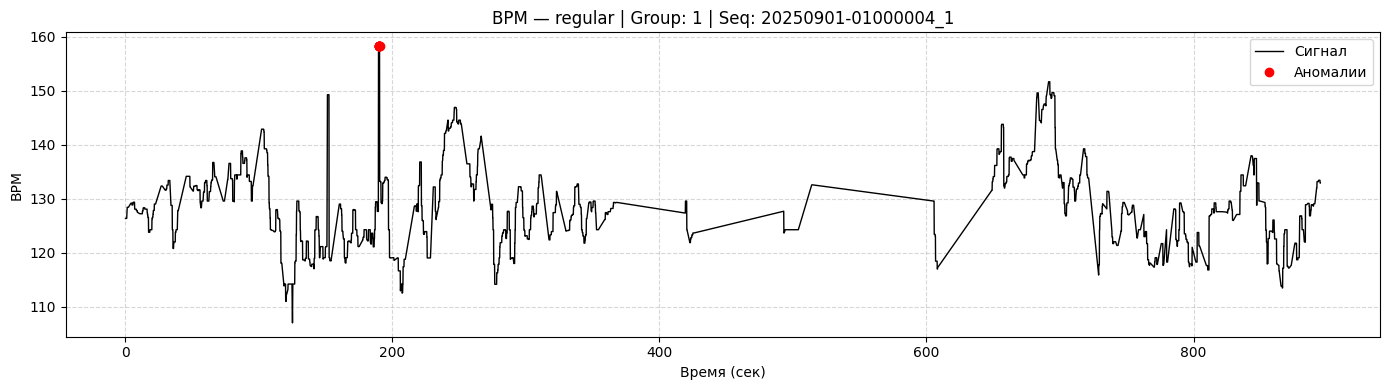

regular / 1 / 20250901-01000005_1
  Точек: 4663, Аномалий: 157, Время: 0.38 мс


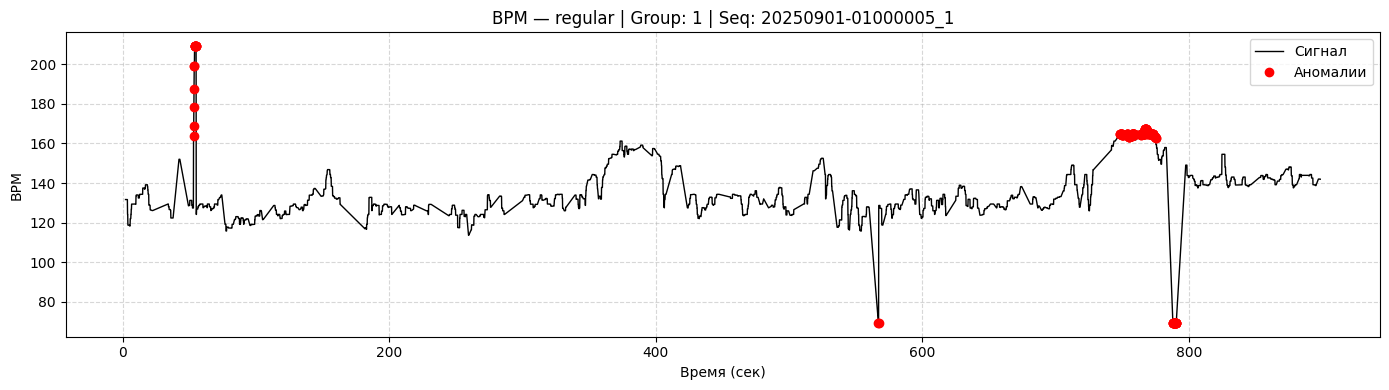

regular / 1 / 20250901-01000006_1
  Точек: 3001, Аномалий: 23, Время: 0.38 мс


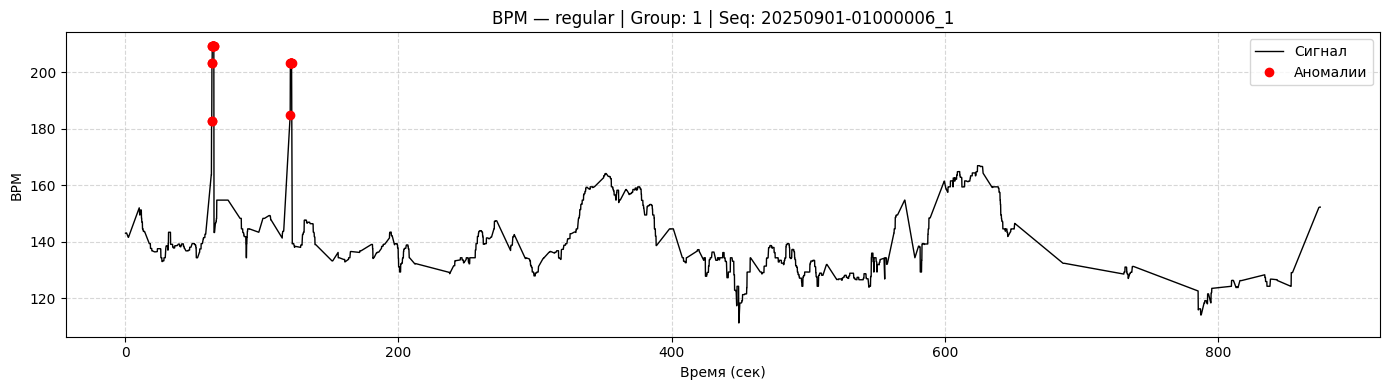

regular / 1 / 20250901-01000007_1
  Точек: 2564, Аномалий: 0, Время: 0.29 мс


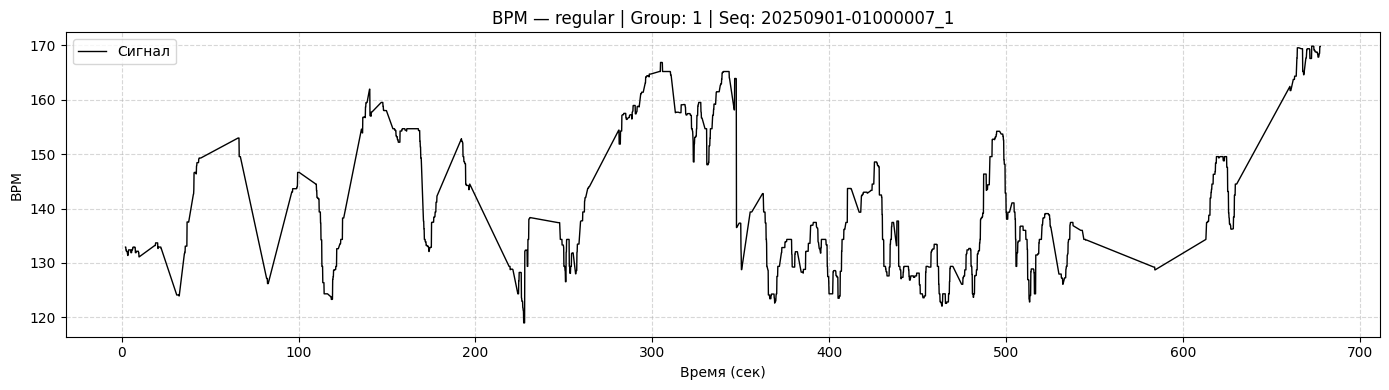

regular / 1 / 20250901-01000008_1
  Точек: 1801, Аномалий: 8, Время: 0.34 мс


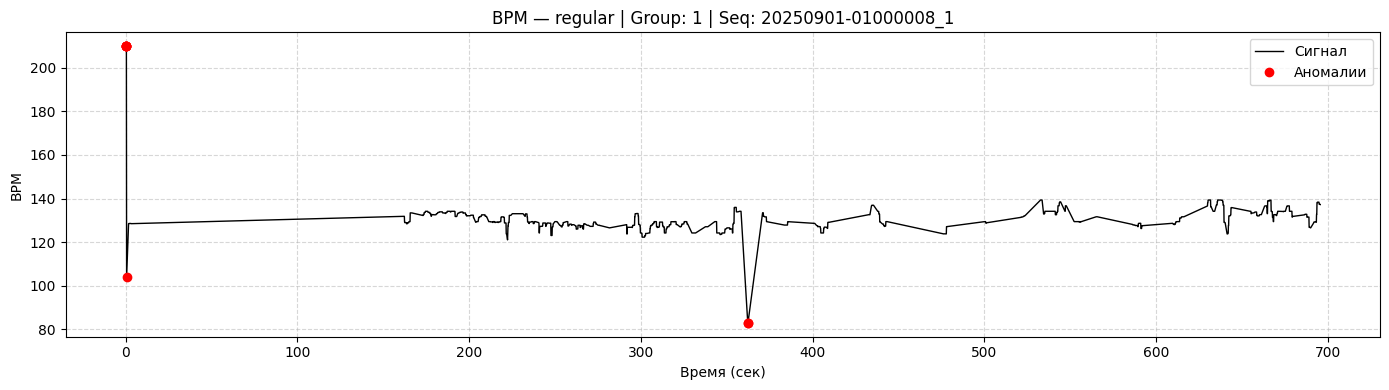

regular / 1 / 20250901-01000009_1
  Точек: 3589, Аномалий: 4, Время: 0.35 мс


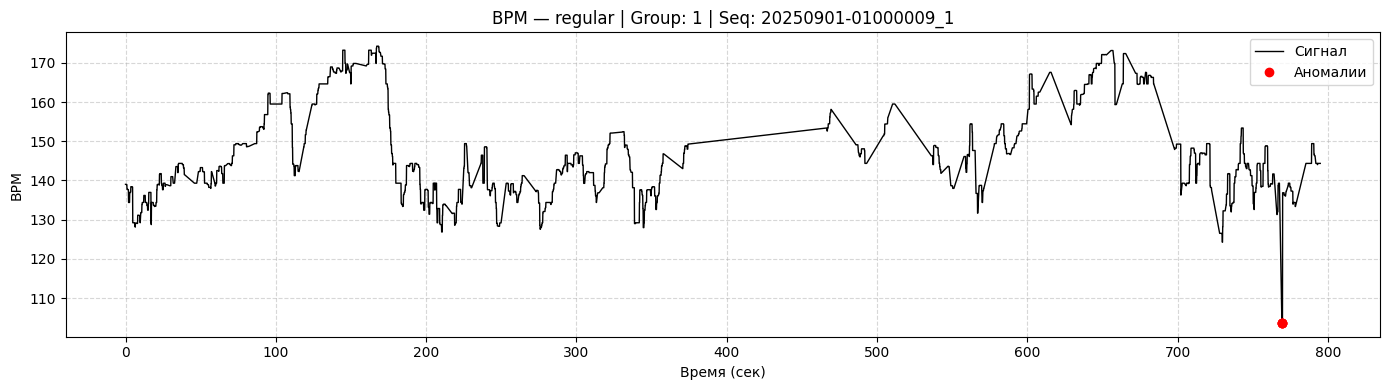

regular / 1 / 20250901-01000010_1
  Точек: 3298, Аномалий: 173, Время: 0.30 мс


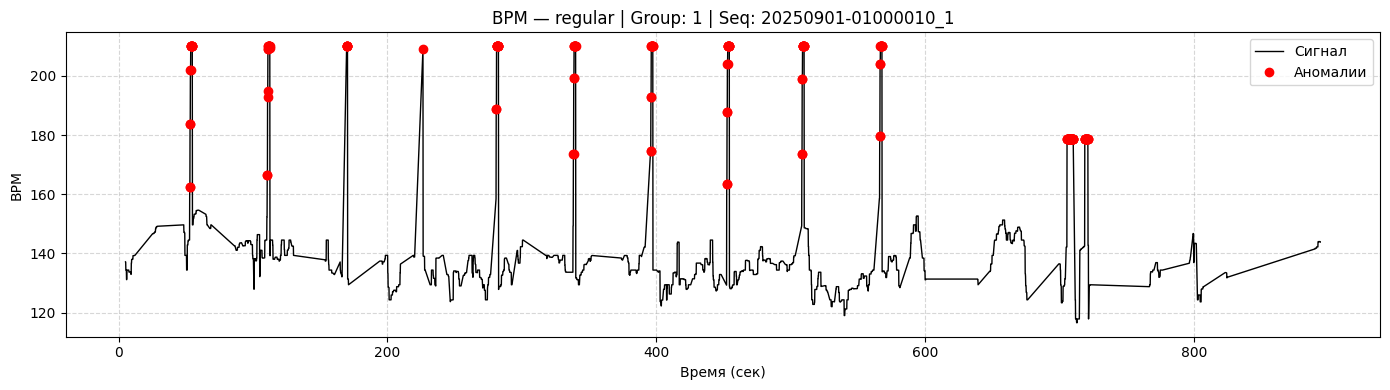

regular / 1 / 20250901-01000011_1
  Точек: 2036, Аномалий: 98, Время: 0.26 мс


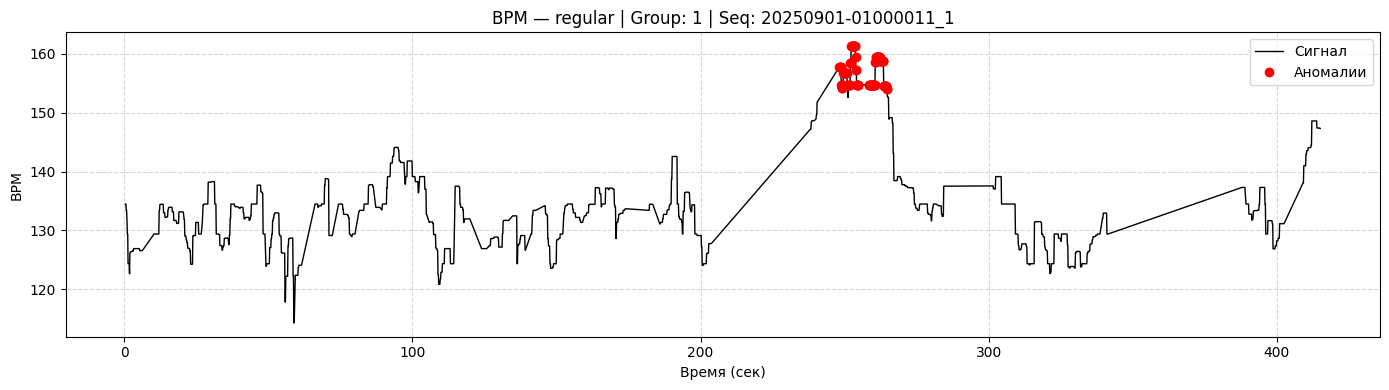

regular / 1 / 20250901-01000011_3
  Точек: 376, Аномалий: 32, Время: 0.33 мс


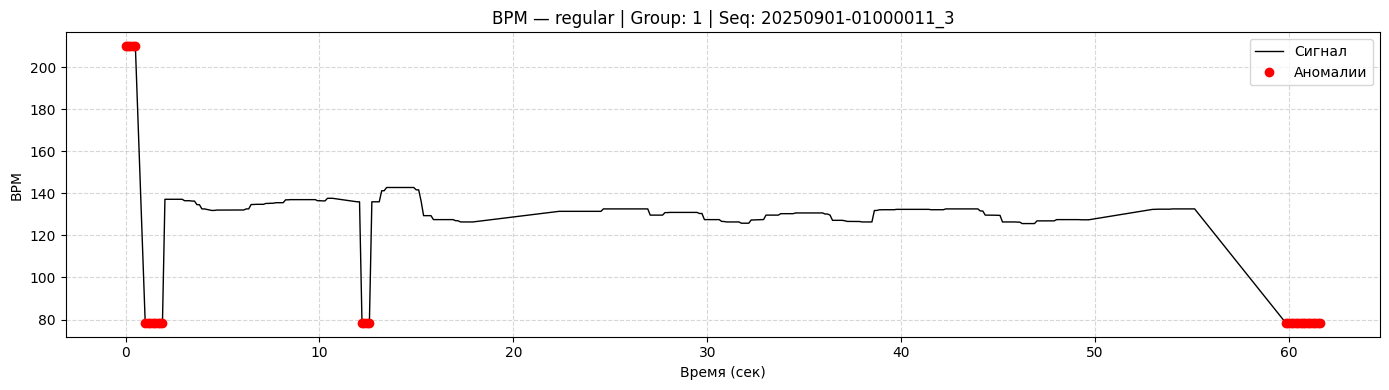

regular / 1 / 20250901-01000012_1
  Точек: 4681, Аномалий: 46, Время: 0.40 мс


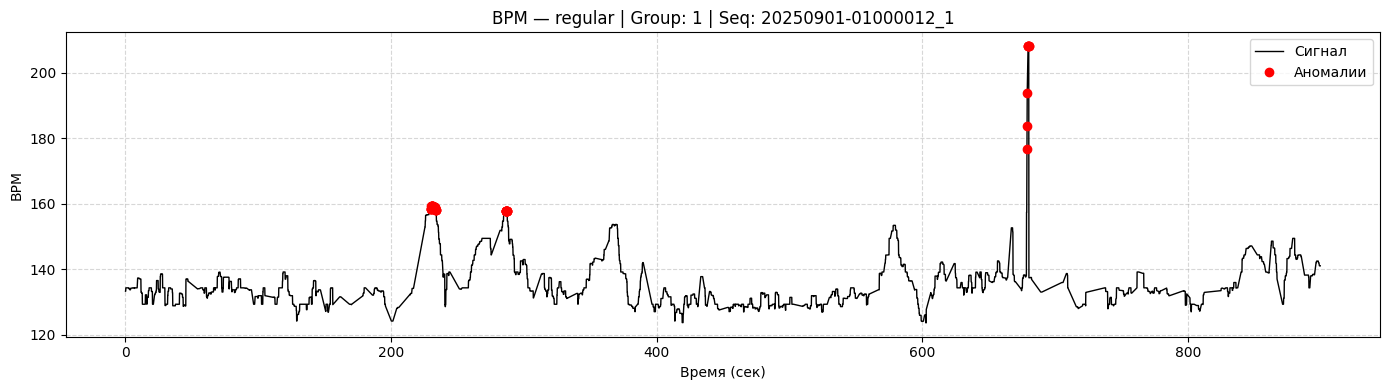

regular / 1 / 20250901-01000013_1
  Точек: 3773, Аномалий: 29, Время: 0.42 мс


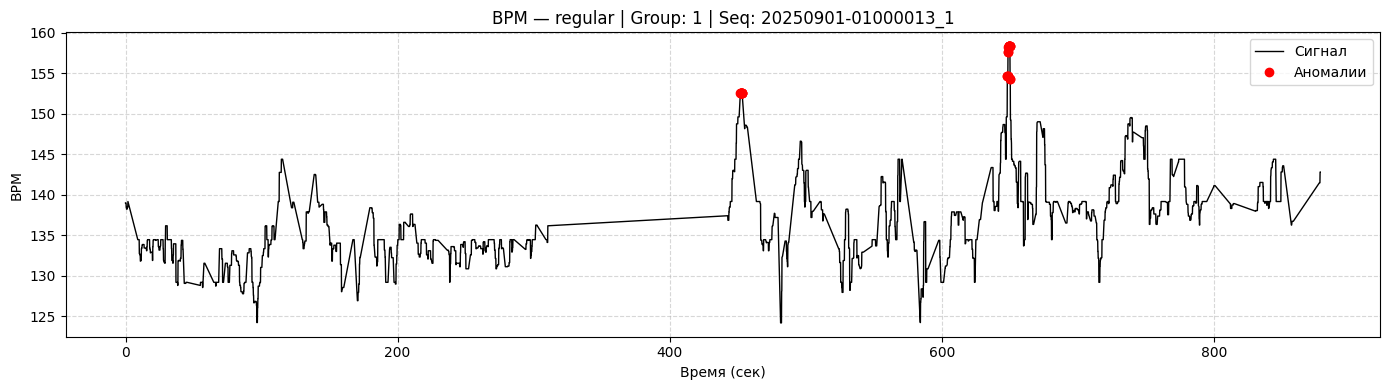

regular / 1 / 20250901-01000014_1
  Точек: 3492, Аномалий: 58, Время: 0.35 мс


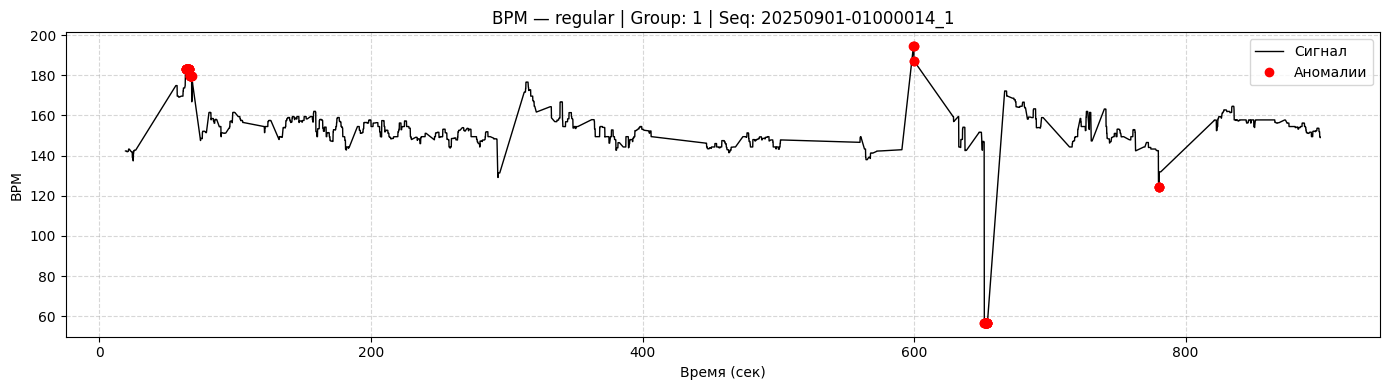

regular / 1 / 20250901-01000015_1
  Точек: 3024, Аномалий: 158, Время: 0.37 мс


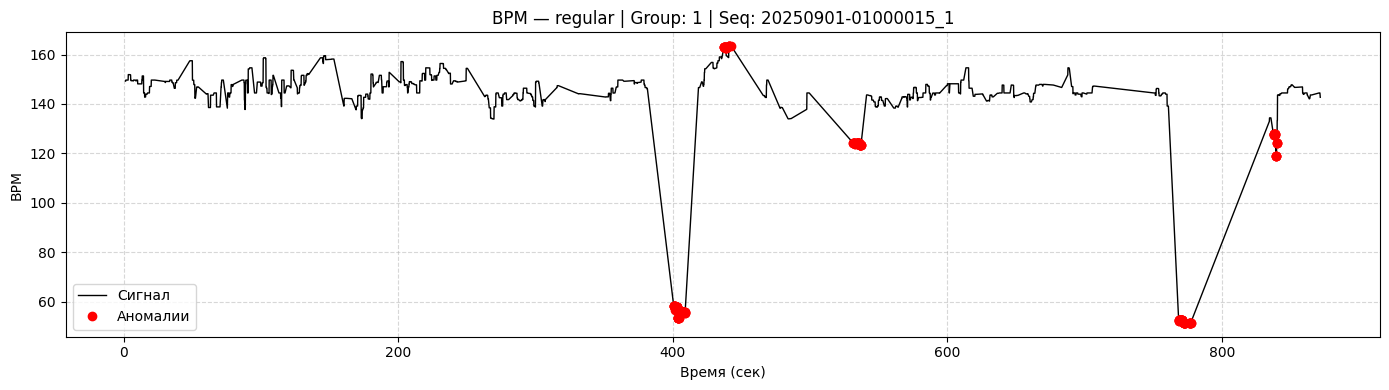

regular / 1 / 20250901-01000016_1
  Точек: 1775, Аномалий: 254, Время: 0.32 мс


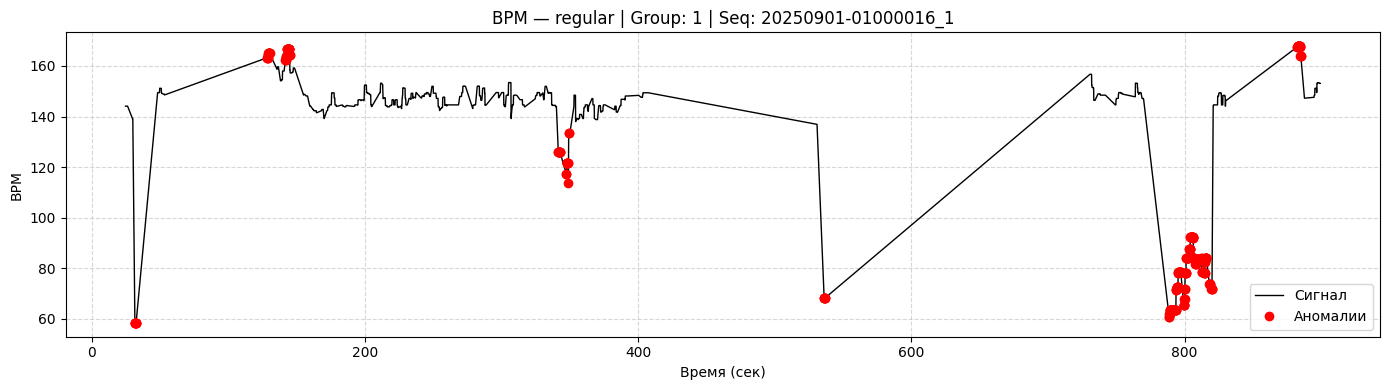

regular / 1 / 20250901-01000017_1
  Точек: 715, Аномалий: 95, Время: 0.76 мс


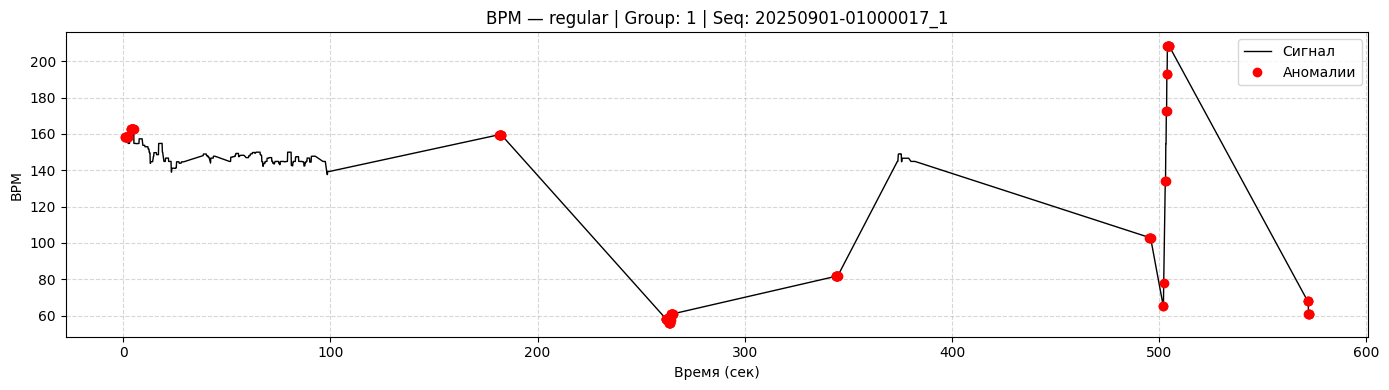

regular / 1 / 20250901-01000018_1
  Точек: 174, Аномалий: 46, Время: 0.42 мс


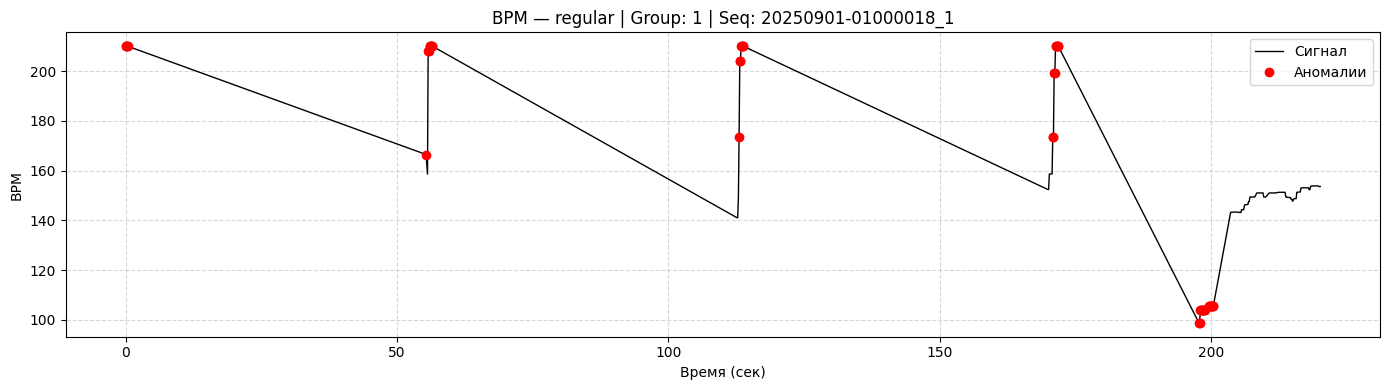

regular / 1 / 20250901-01000019_1
  Точек: 1086, Аномалий: 49, Время: 0.38 мс


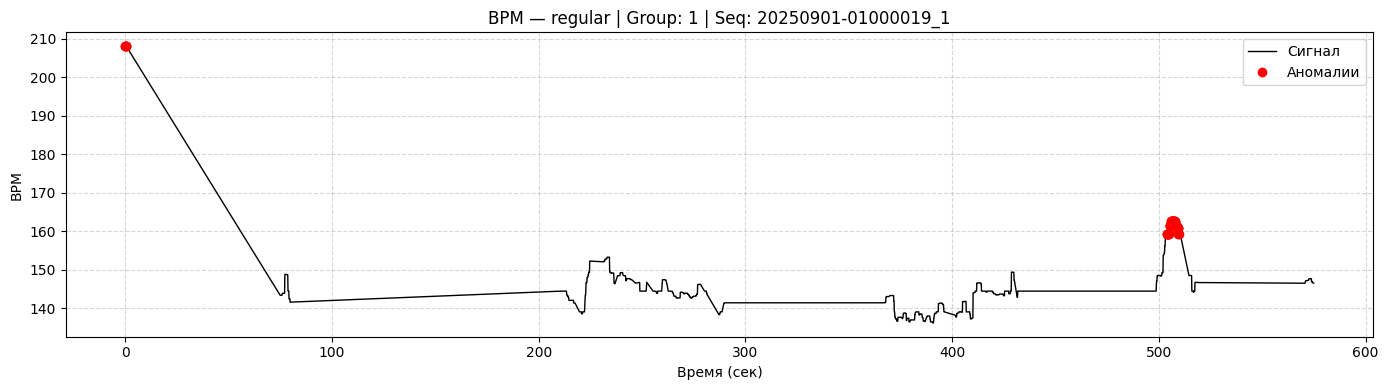

hypoxia / 1 / 20250908-07500001_1
  Точек: 815, Аномалий: 57, Время: 0.27 мс


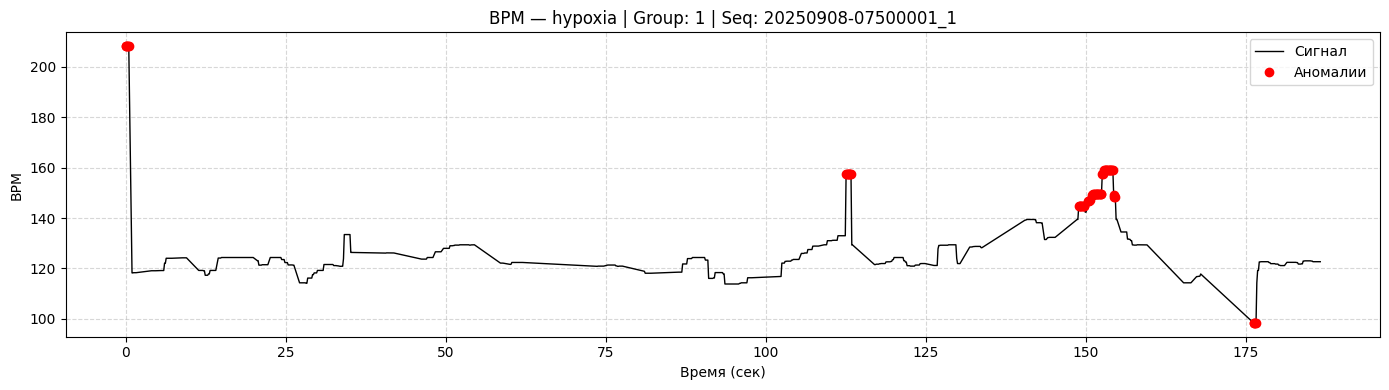

hypoxia / 1 / 20250908-07500002_1
  Точек: 4041, Аномалий: 101, Время: 0.40 мс


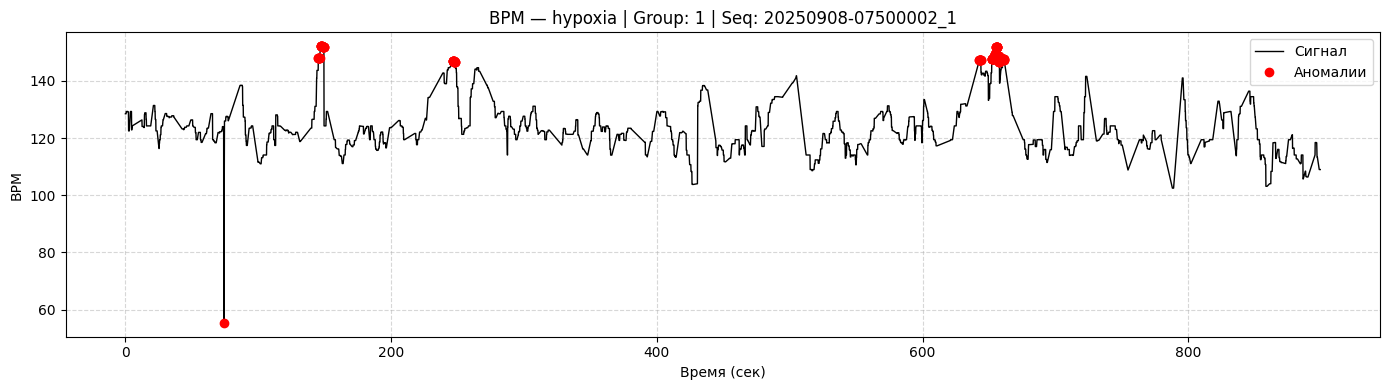

hypoxia / 1 / 20250908-07500003_1
  Точек: 2501, Аномалий: 10, Время: 0.35 мс


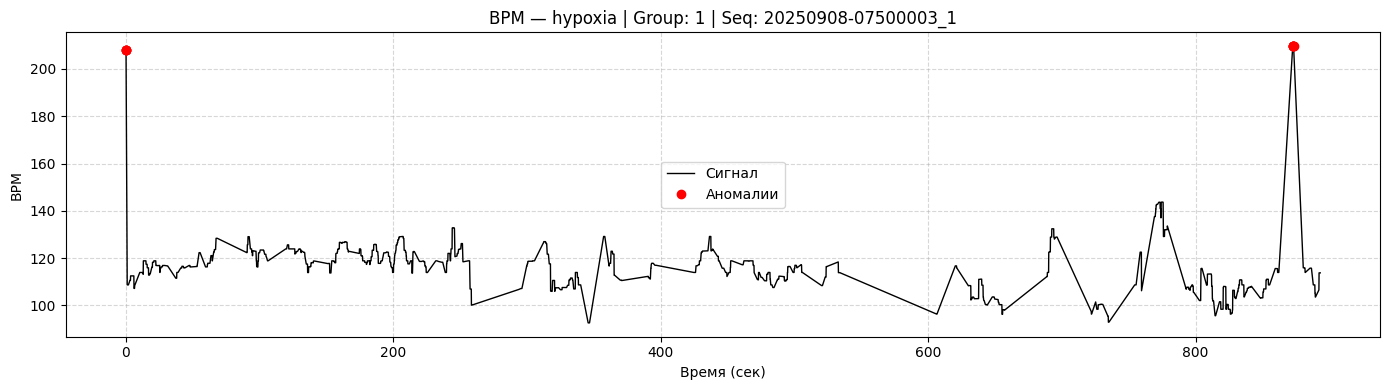

hypoxia / 1 / 20250908-07500004_1
  Точек: 2635, Аномалий: 50, Время: 0.36 мс


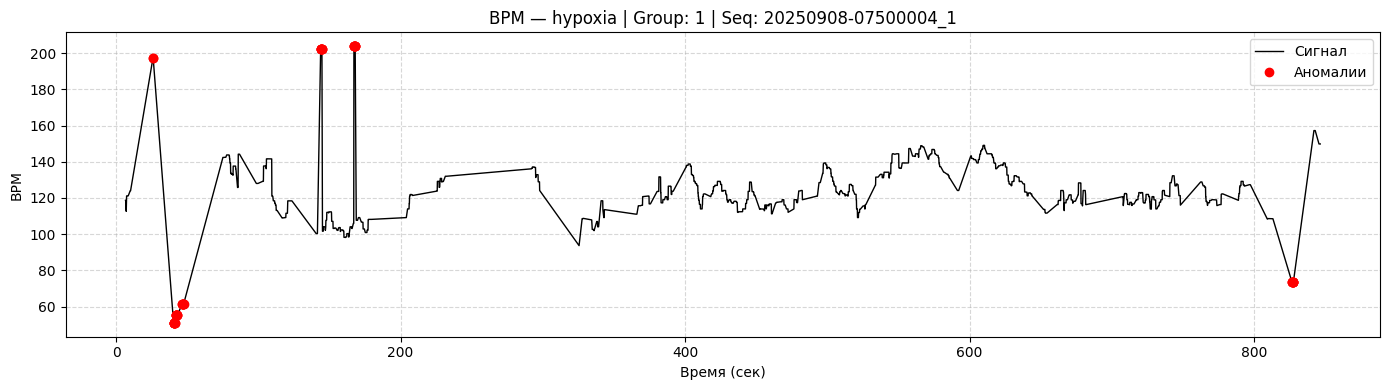

regular / 10 / 20250829-00400001_1
  Точек: 1503, Аномалий: 65, Время: 0.25 мс


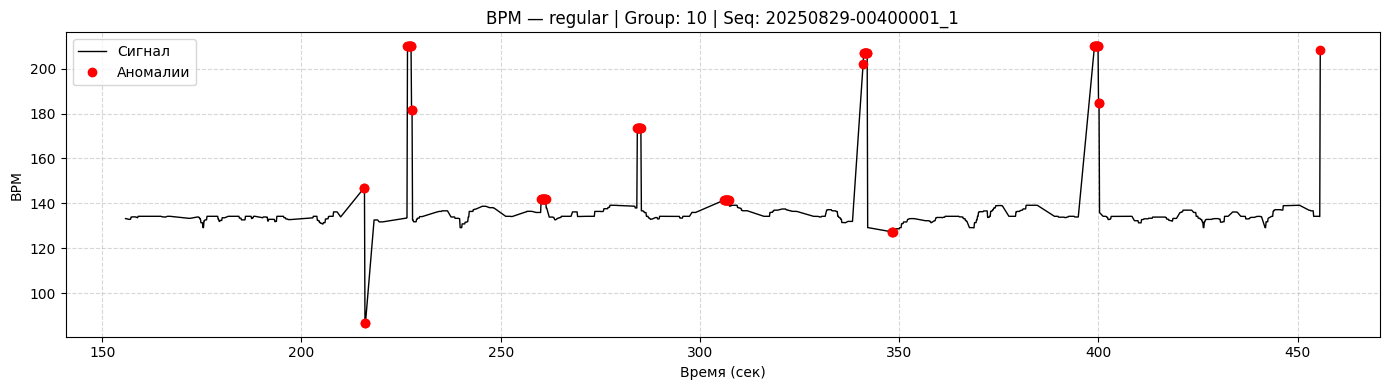

regular / 10 / 20250829-00400002_1
  Точек: 3864, Аномалий: 225, Время: 0.31 мс


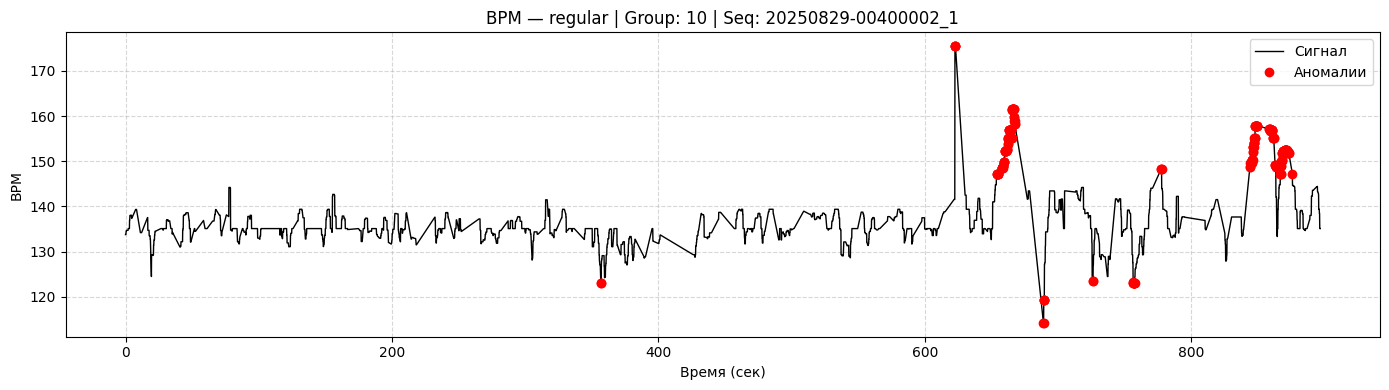

regular / 10 / 20250829-00400003_1
  Точек: 3664, Аномалий: 0, Время: 0.35 мс


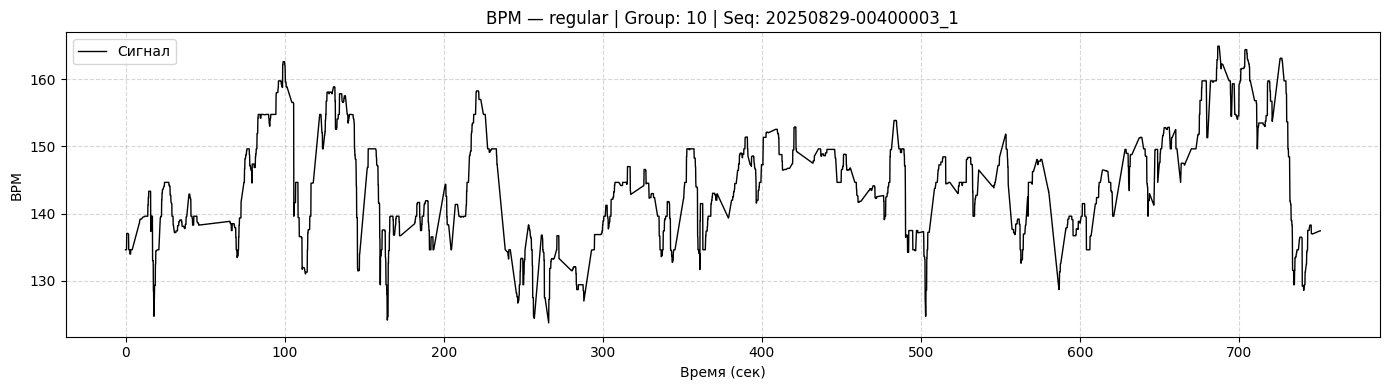

regular / 10 / 20250829-00400004_1
  Точек: 2081, Аномалий: 87, Время: 0.33 мс


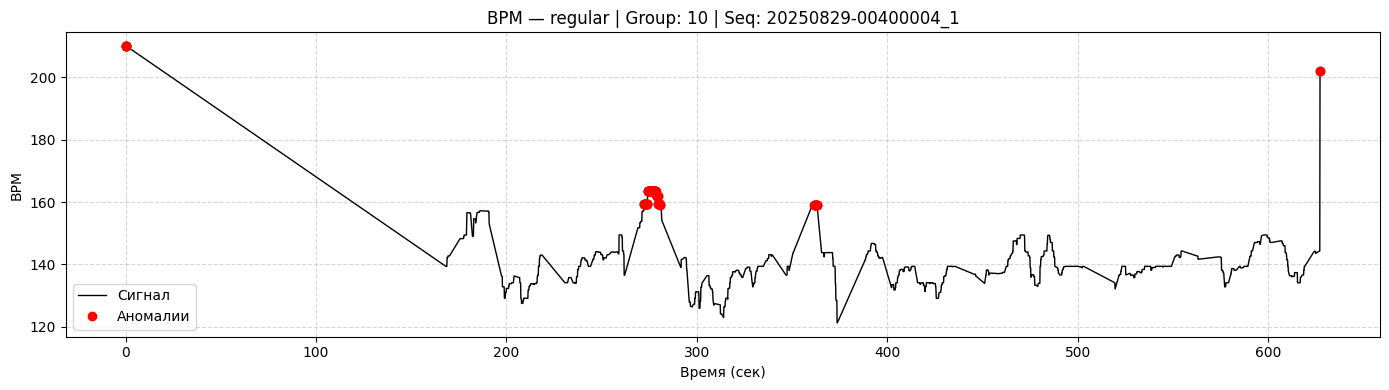

regular / 10 / 20250829-00400005_1
  Точек: 4161, Аномалий: 58, Время: 0.53 мс


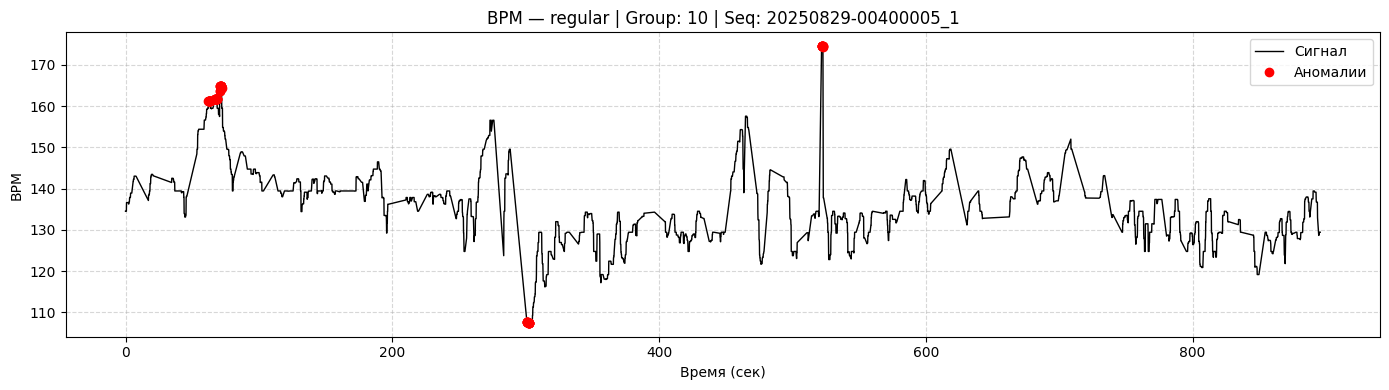

regular / 10 / 20250829-00400006_1
  Точек: 3364, Аномалий: 45, Время: 0.42 мс


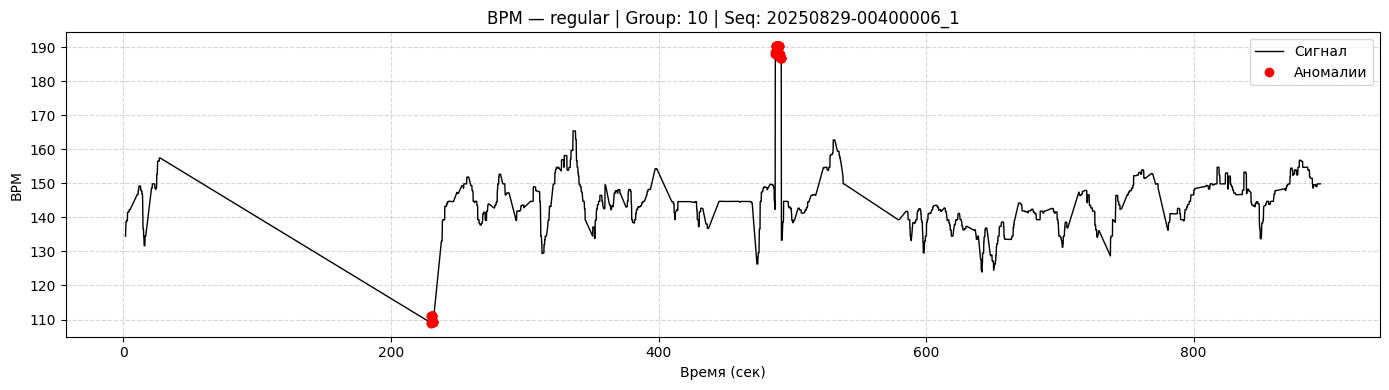

regular / 10 / 20250829-00400007_1
  Точек: 3928, Аномалий: 13, Время: 0.41 мс


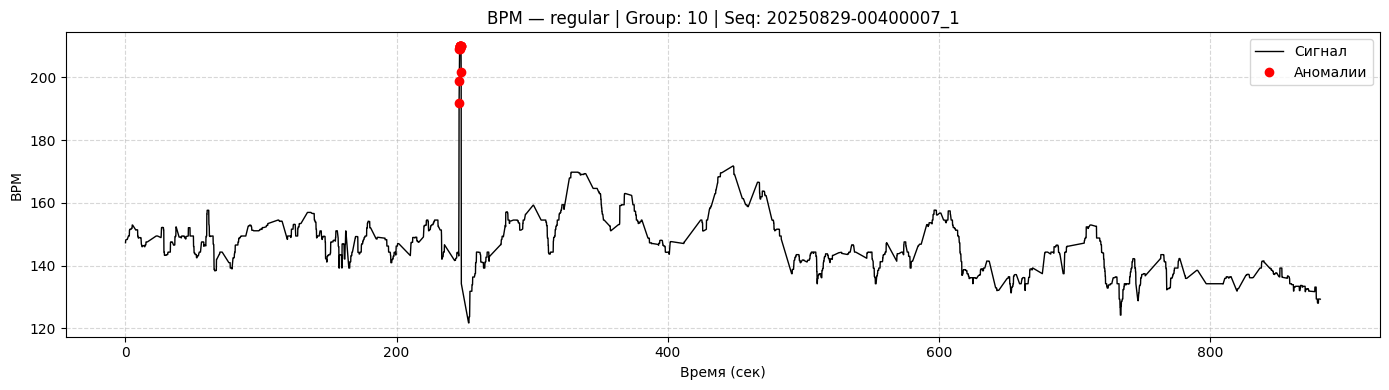

regular / 10 / 20250829-00400008_1
  Точек: 747, Аномалий: 0, Время: 0.37 мс


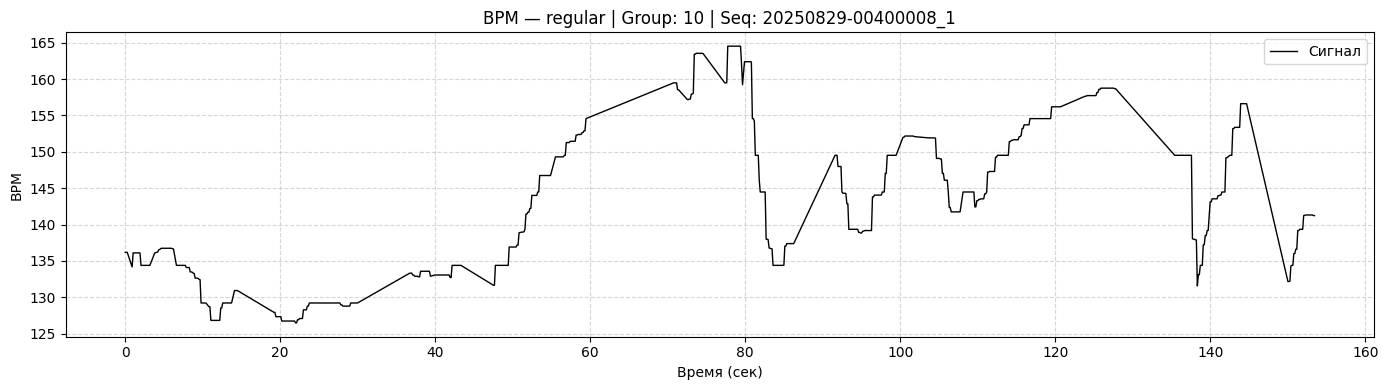

regular / 10 / 20250829-00400008_3
  Точек: 1568, Аномалий: 30, Время: 0.30 мс


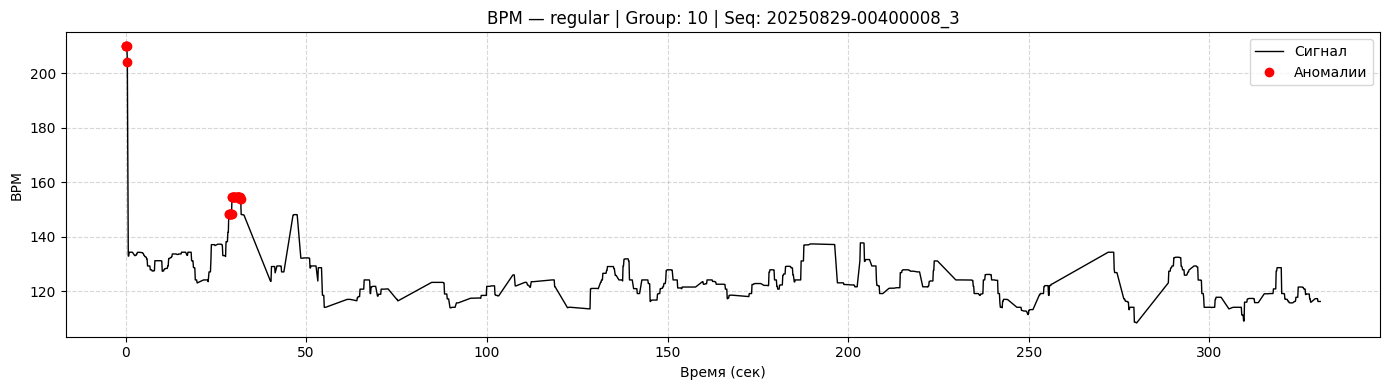

regular / 10 / 20250829-00400009_1
  Точек: 4280, Аномалий: 0, Время: 0.29 мс


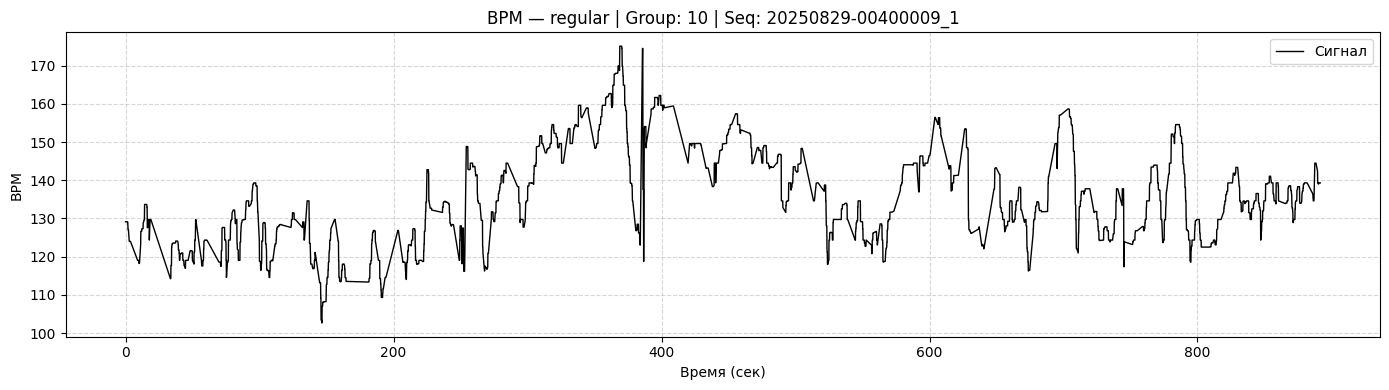

regular / 10 / 20250829-00400010_1
  Точек: 4776, Аномалий: 111, Время: 0.41 мс


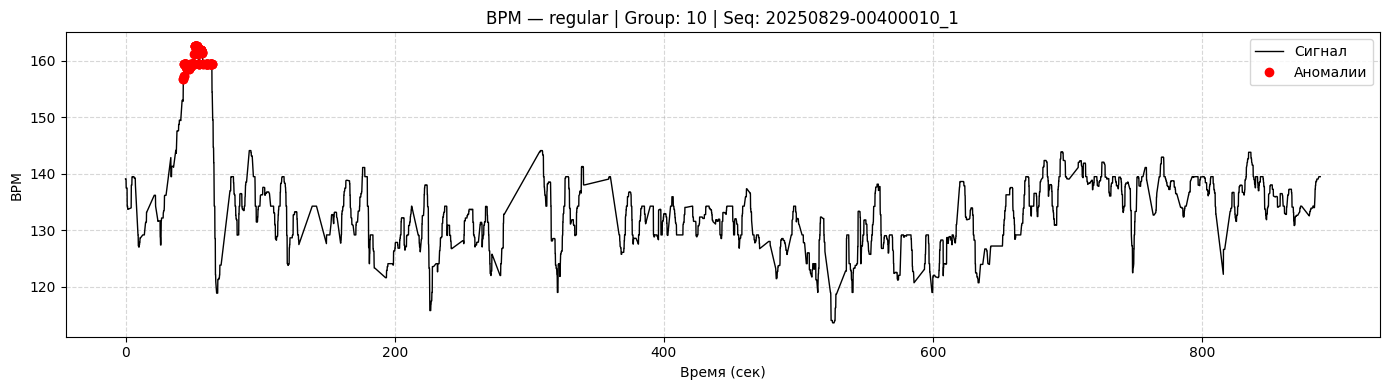

regular / 10 / 20250829-00400011_1
  Точек: 4785, Аномалий: 75, Время: 0.41 мс


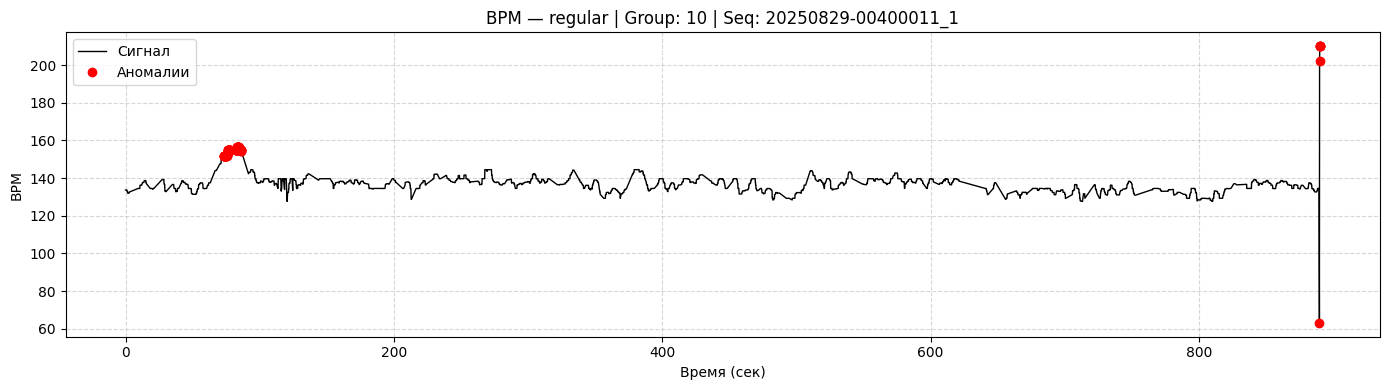

regular / 10 / 20250829-00400012_1
  Точек: 3246, Аномалий: 190, Время: 0.40 мс


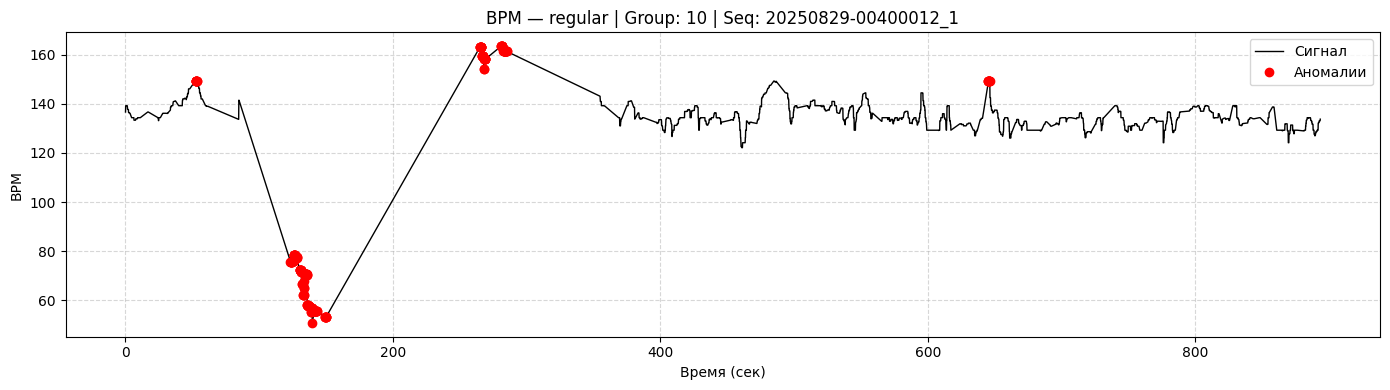

regular / 10 / 20250829-00400013_1
  Точек: 4833, Аномалий: 294, Время: 0.33 мс


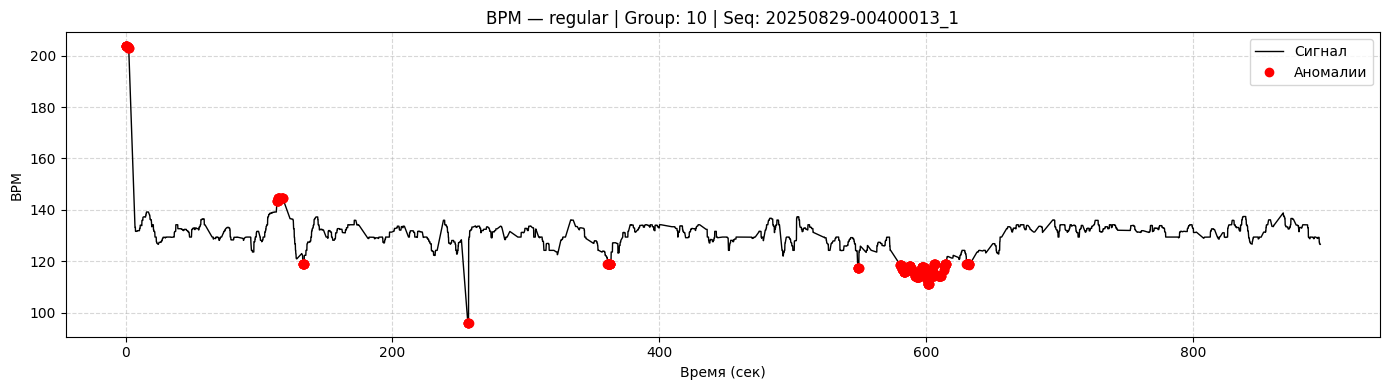

regular / 10 / 20250829-00400014_1
  Точек: 4507, Аномалий: 30, Время: 0.32 мс


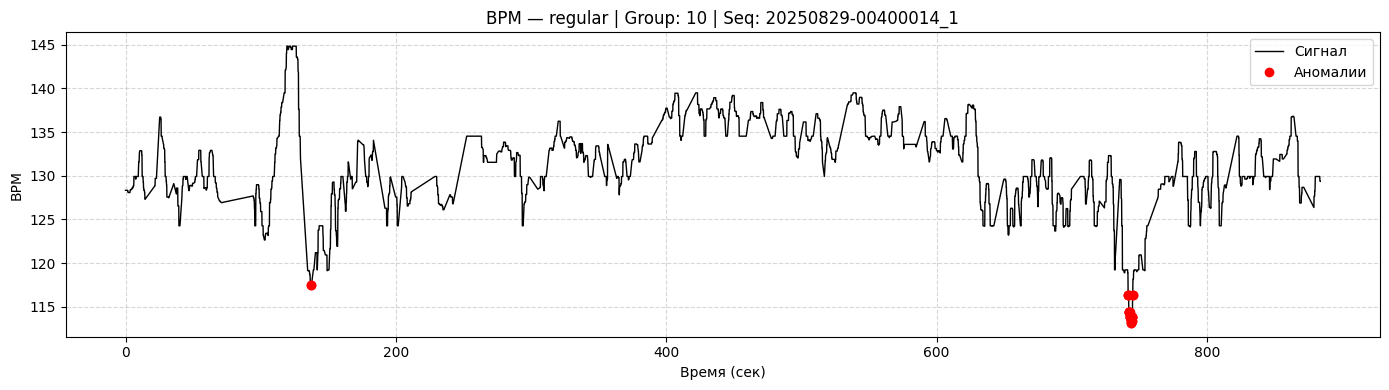

regular / 10 / 20250829-00400015_1
  Точек: 4615, Аномалий: 93, Время: 0.29 мс


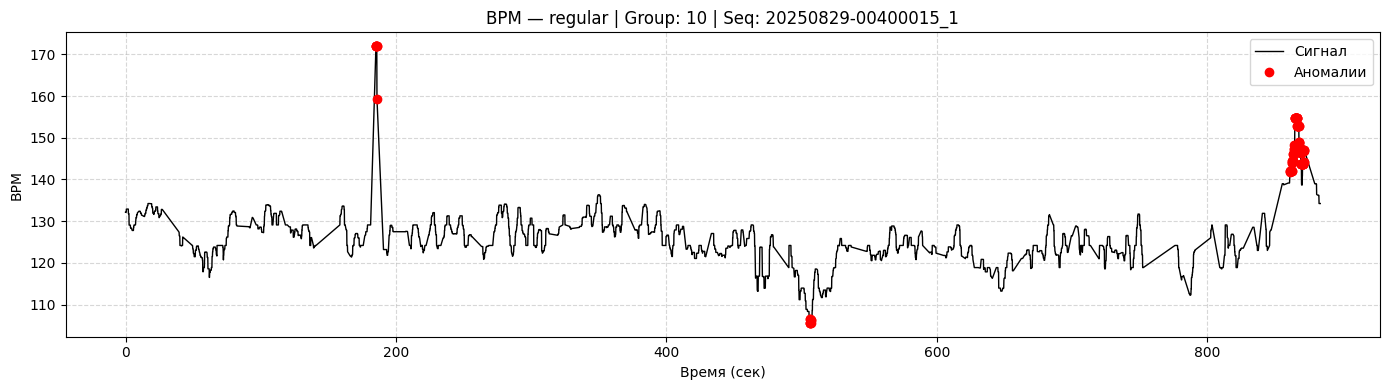

regular / 10 / 20250829-00400016_1
  Точек: 4442, Аномалий: 7, Время: 0.27 мс


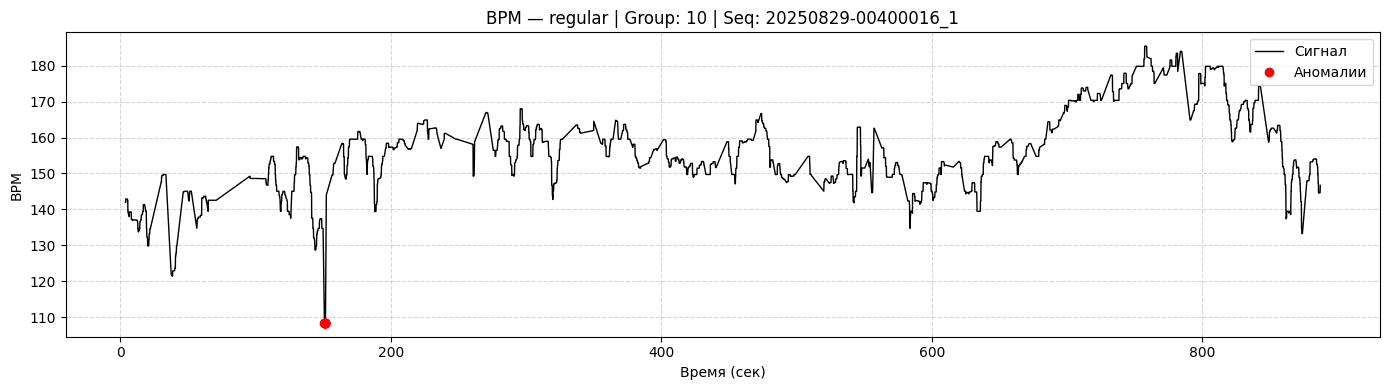

regular / 10 / 20250829-00400017_1
  Точек: 4437, Аномалий: 1, Время: 0.43 мс


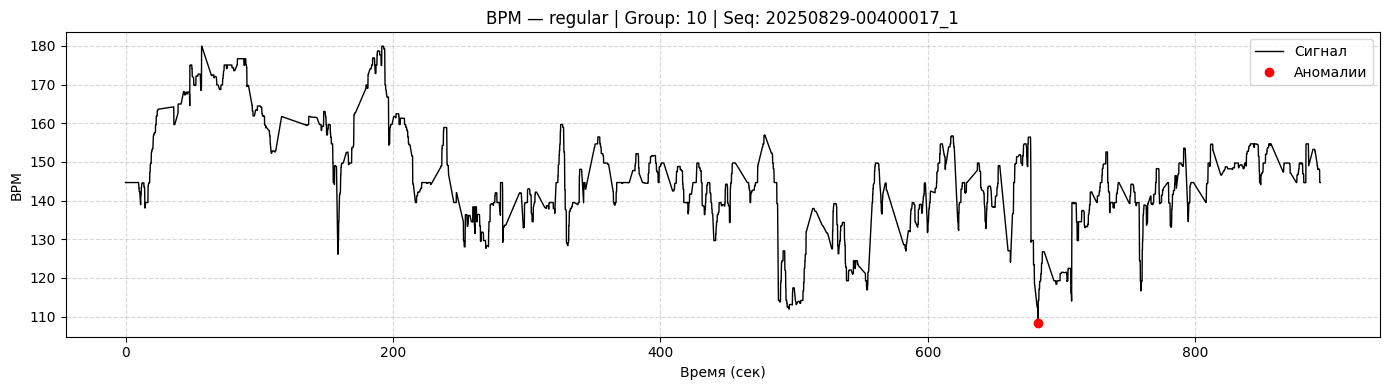

regular / 10 / 20250829-00400018_1
  Точек: 4876, Аномалий: 6, Время: 0.37 мс


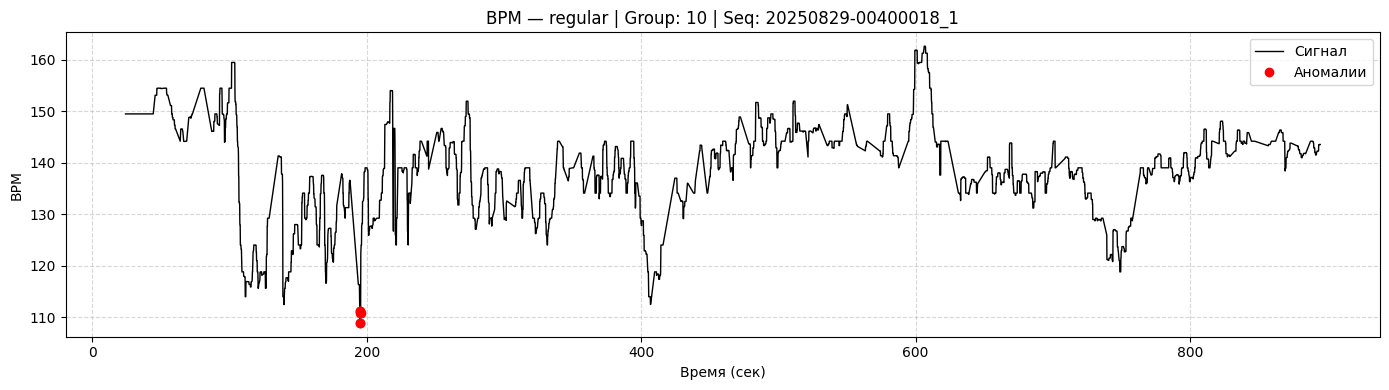

regular / 10 / 20250829-00400019_1
  Точек: 4229, Аномалий: 126, Время: 0.48 мс


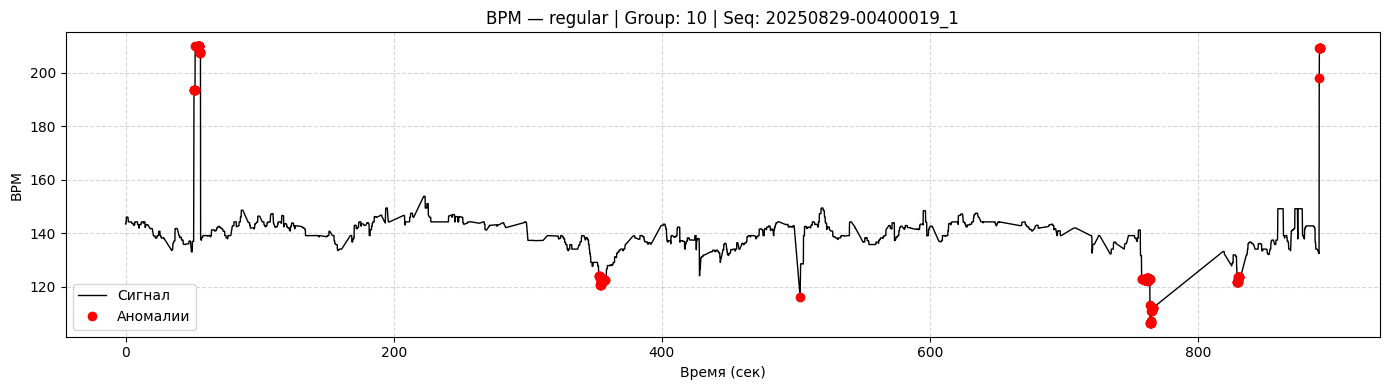

regular / 10 / 20250829-00400020_1
  Точек: 4370, Аномалий: 44, Время: 0.48 мс


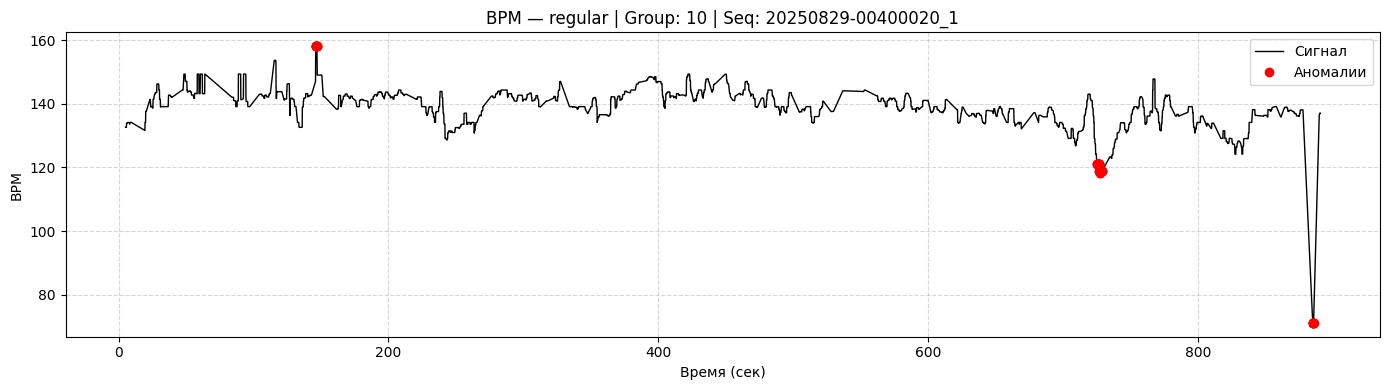

regular / 10 / 20250829-00400021_1
  Точек: 4440, Аномалий: 54, Время: 0.37 мс


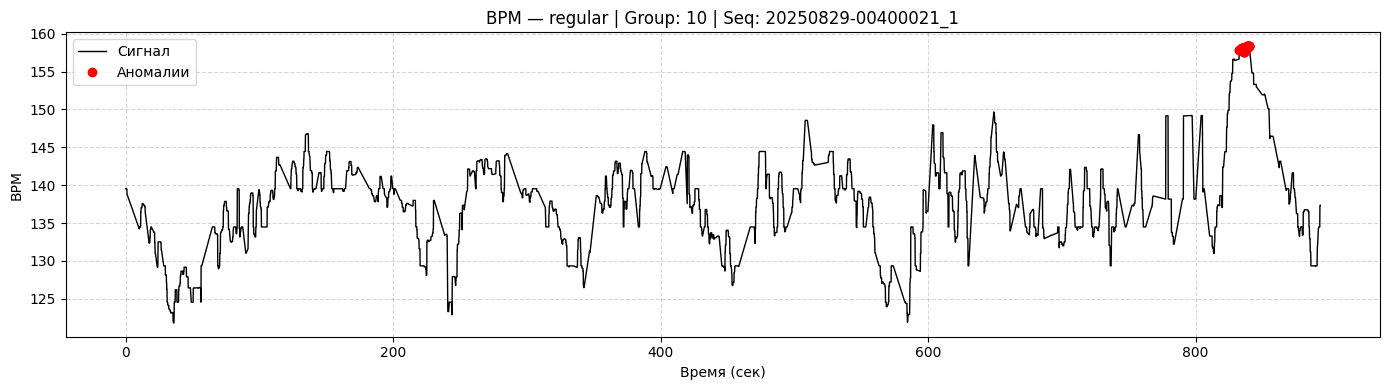

regular / 10 / 20250829-00400022_1
  Точек: 4554, Аномалий: 71, Время: 0.30 мс


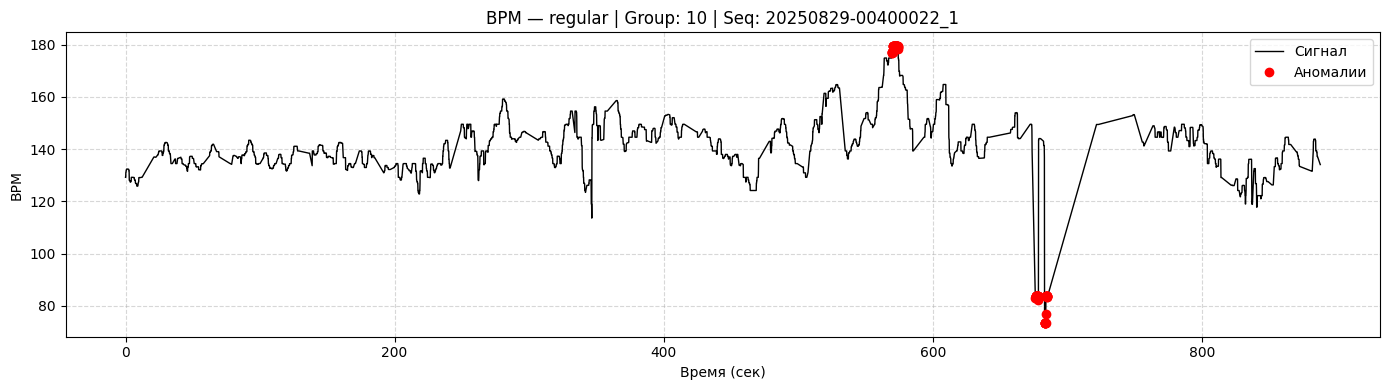

regular / 10 / 20250829-00400023_1
  Точек: 4914, Аномалий: 239, Время: 0.28 мс


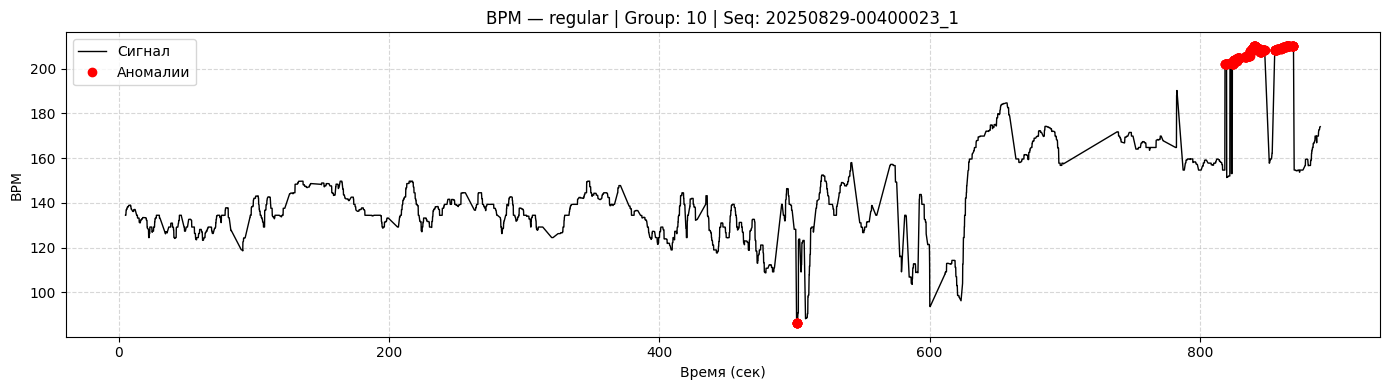

regular / 10 / 20250829-00400024_1
  Точек: 4959, Аномалий: 126, Время: 0.46 мс


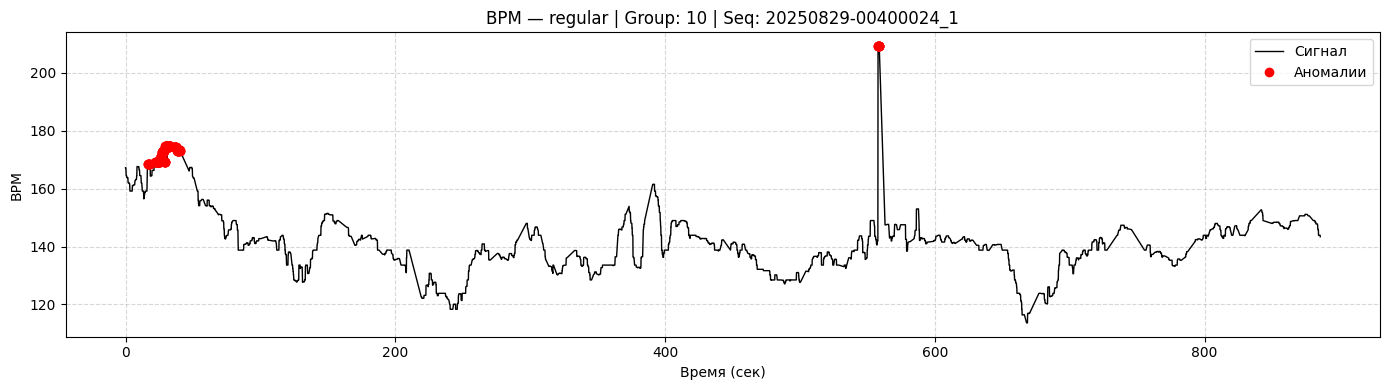

regular / 10 / 20250829-00400025_1
  Точек: 4158, Аномалий: 19, Время: 0.38 мс


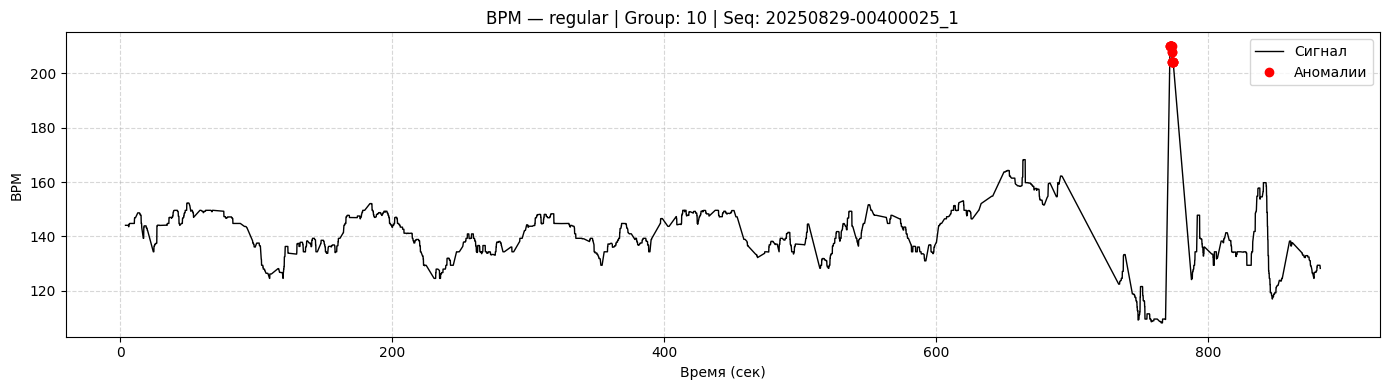

regular / 10 / 20250829-00400026_1
  Точек: 2330, Аномалий: 10, Время: 0.41 мс


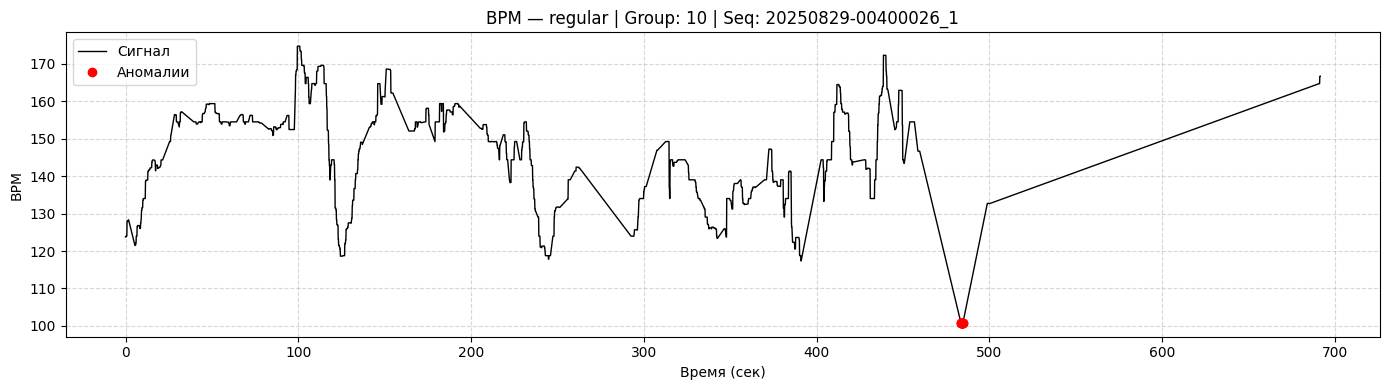

hypoxia / 10 / 20250908-07400001_1
  Точек: 120, Аномалий: 3, Время: 0.32 мс


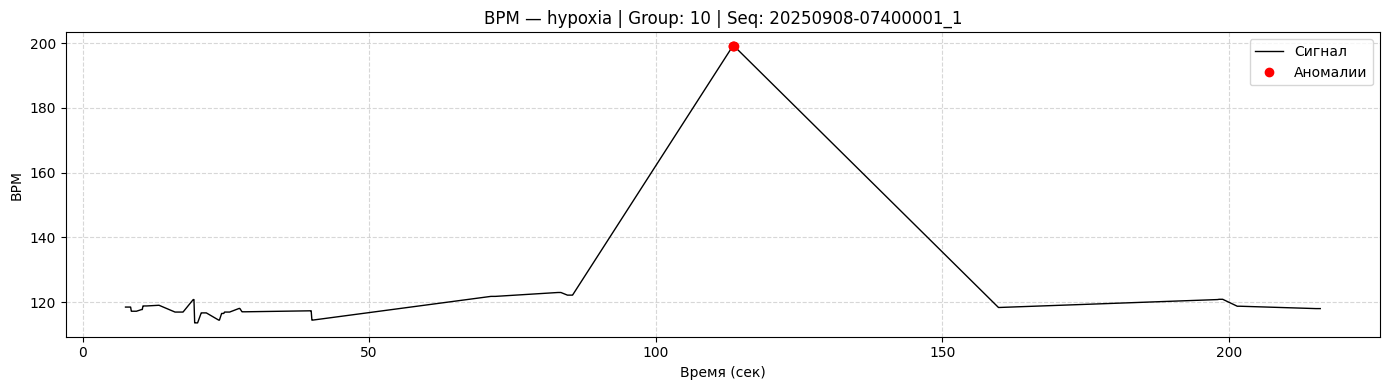

hypoxia / 10 / 20250908-07400002_1
  Точек: 2319, Аномалий: 140, Время: 0.33 мс


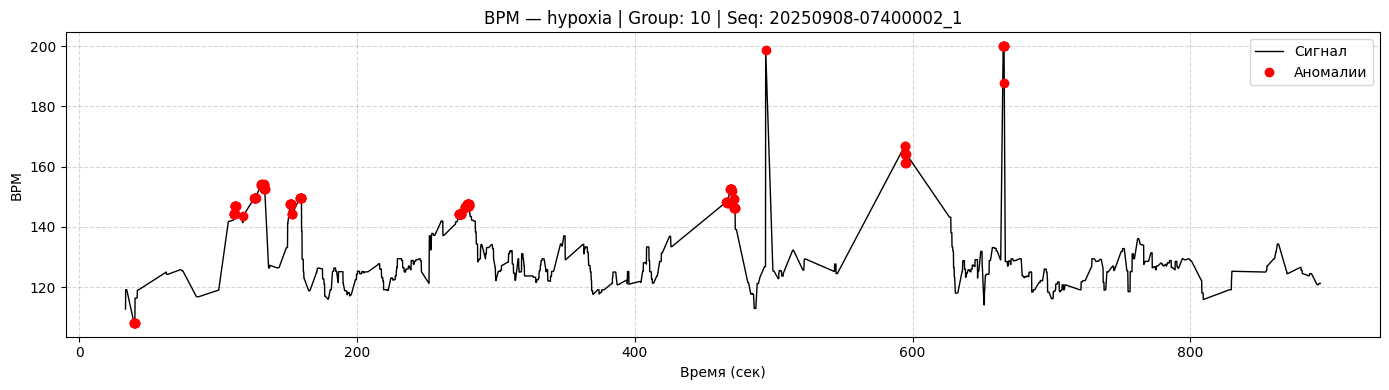

hypoxia / 10 / 20250908-07400003_1
  Точек: 1105, Аномалий: 289, Время: 0.31 мс


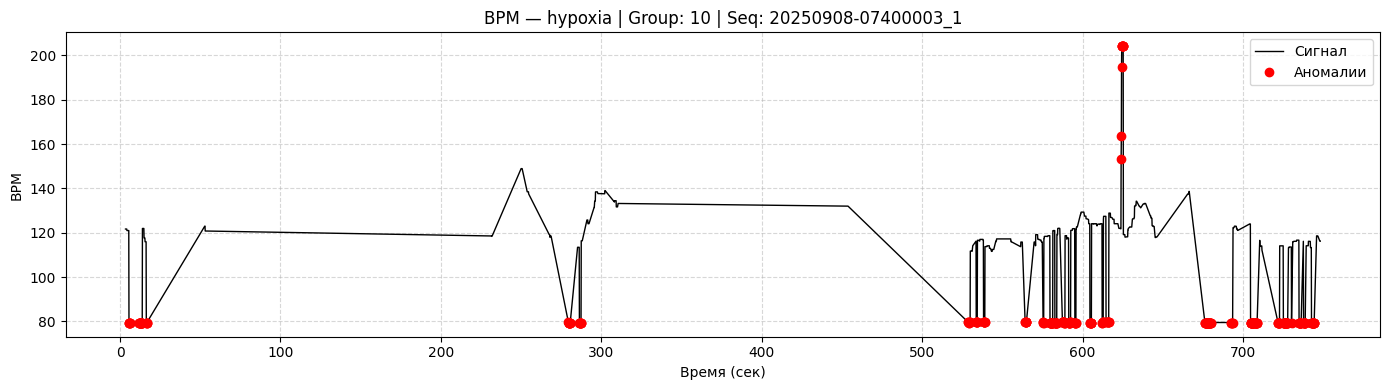

hypoxia / 10 / 20250908-07400004_1
  Точек: 3038, Аномалий: 11, Время: 0.25 мс


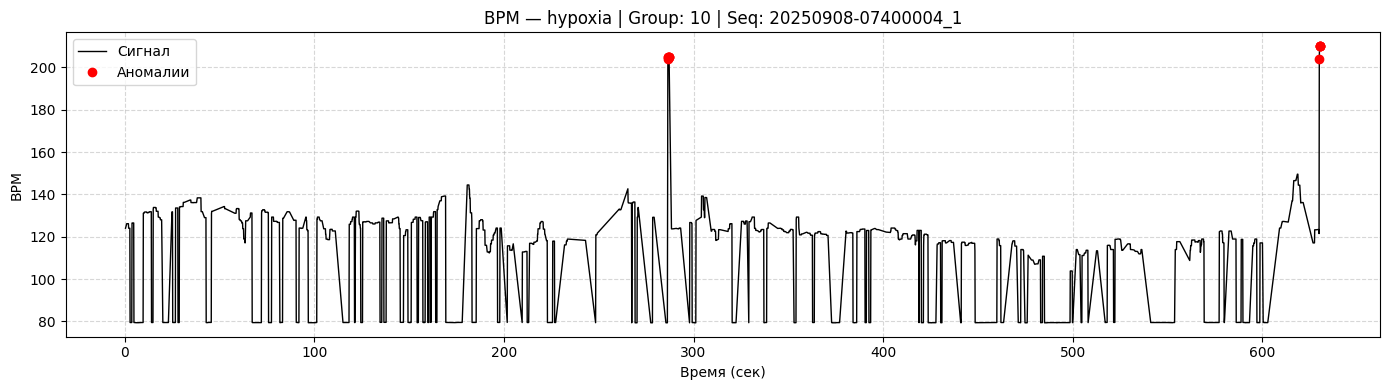

hypoxia / 10 / 20250908-07400005_1
  Точек: 177, Аномалий: 30, Время: 0.46 мс


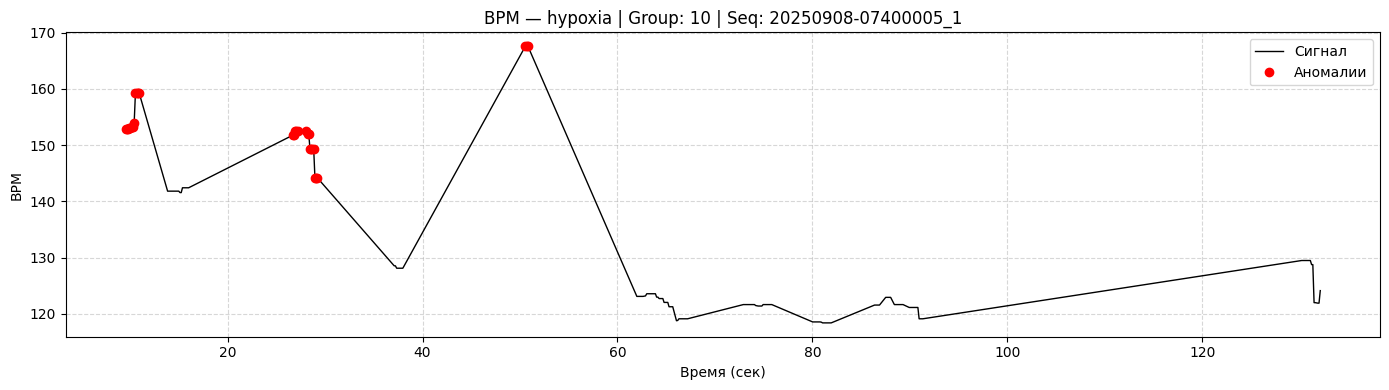

hypoxia / 10 / 20250908-07400005_3
  Точек: 500, Аномалий: 0, Время: 0.53 мс


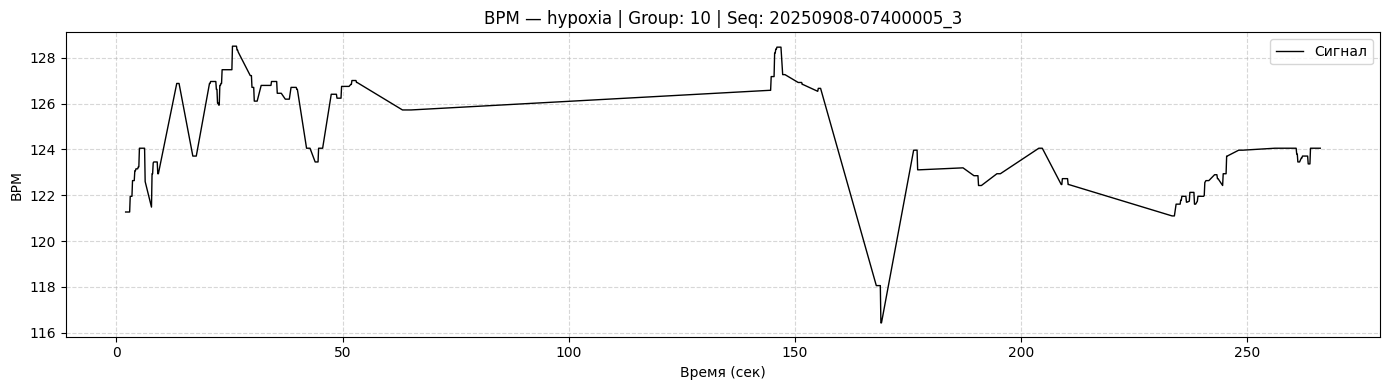

hypoxia / 10 / 20250908-07400006_1
  Точек: 570, Аномалий: 13, Время: 0.64 мс


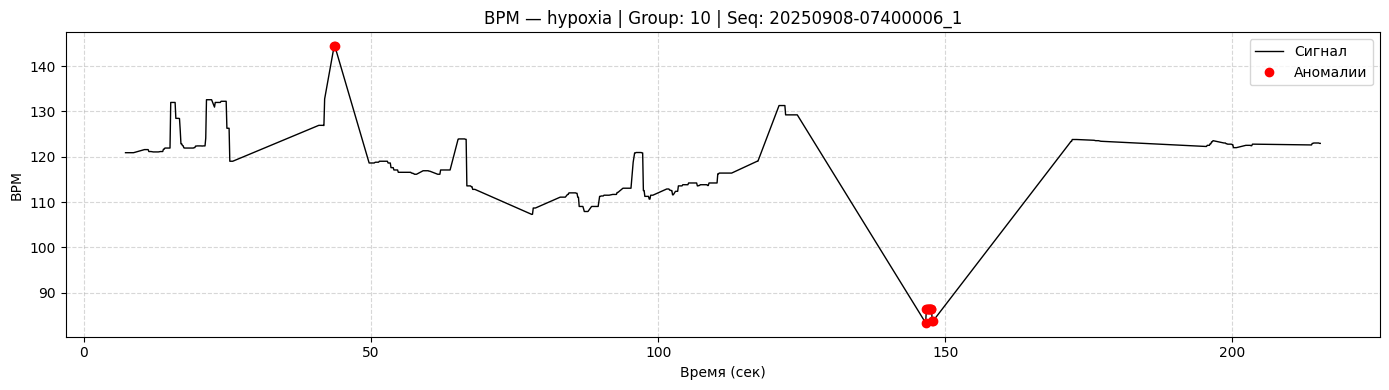

hypoxia / 10 / 20250908-07400006_3
  Точек: 1693, Аномалий: 136, Время: 0.35 мс


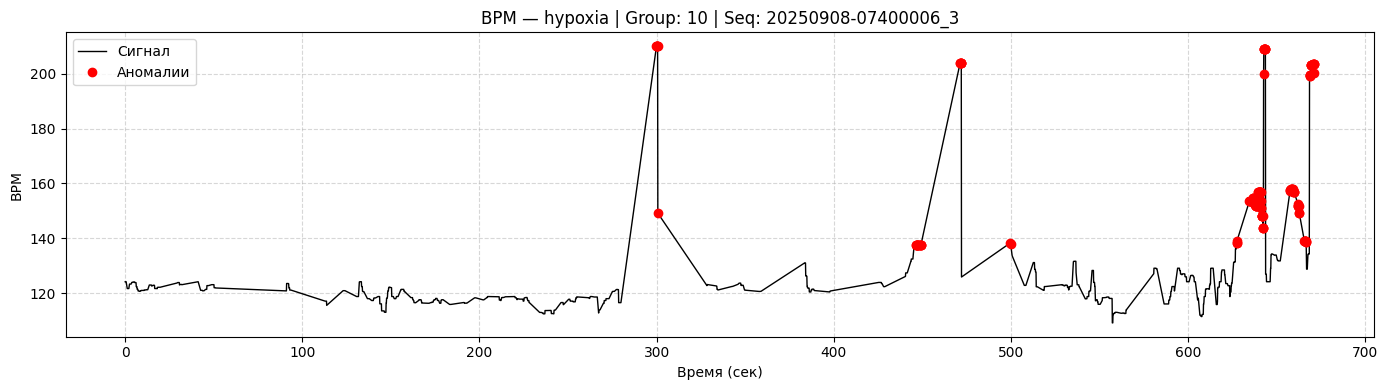

hypoxia / 10 / 20250908-07400007_1
  Точек: 2633, Аномалий: 65, Время: 0.37 мс


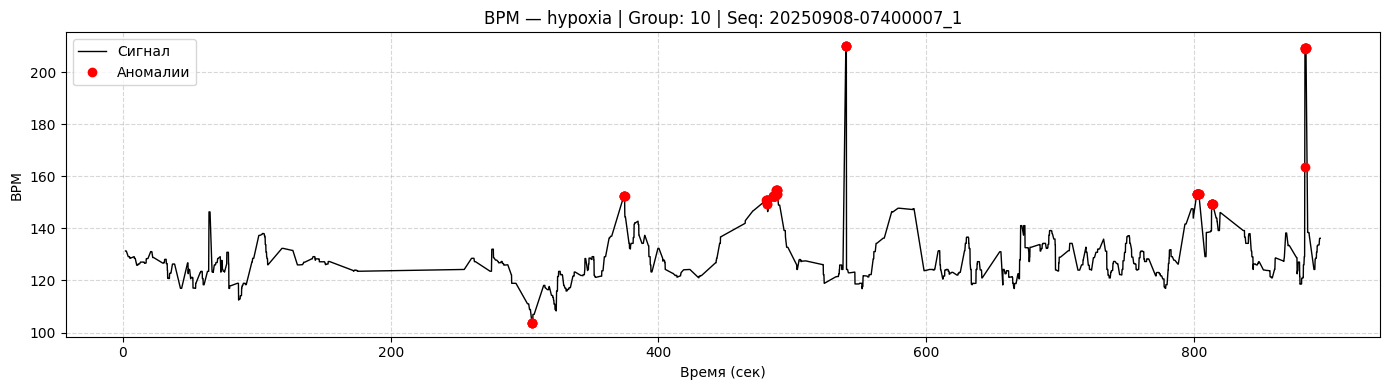

hypoxia / 10 / 20250908-07400008_1
  Точек: 2433, Аномалий: 62, Время: 0.33 мс


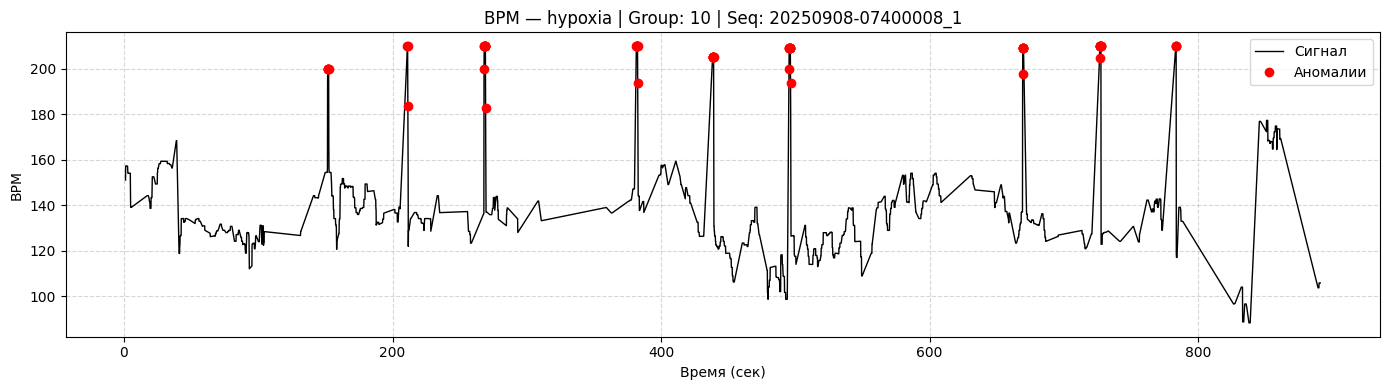

hypoxia / 10 / 20250908-07400009_1
  Точек: 1105, Аномалий: 8, Время: 0.30 мс


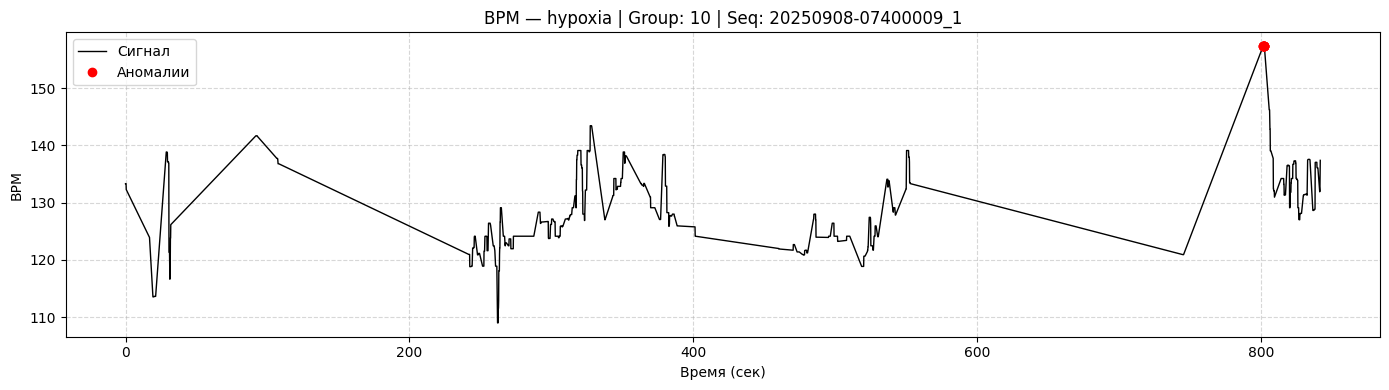

hypoxia / 10 / 20250908-07400010_1
  Точек: 560, Аномалий: 27, Время: 0.59 мс


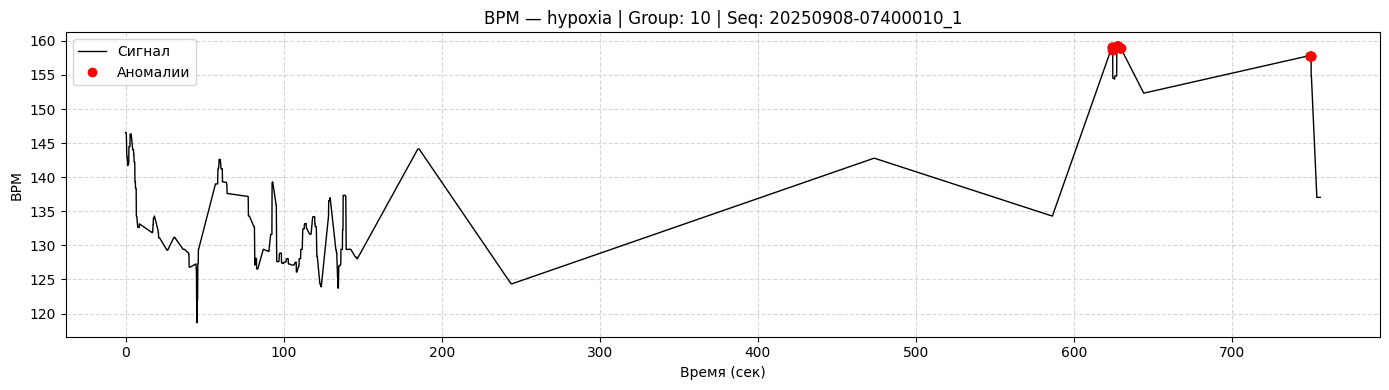

hypoxia / 10 / 20250908-07400011_1
  Точек: 110, Аномалий: 20, Время: 1.05 мс


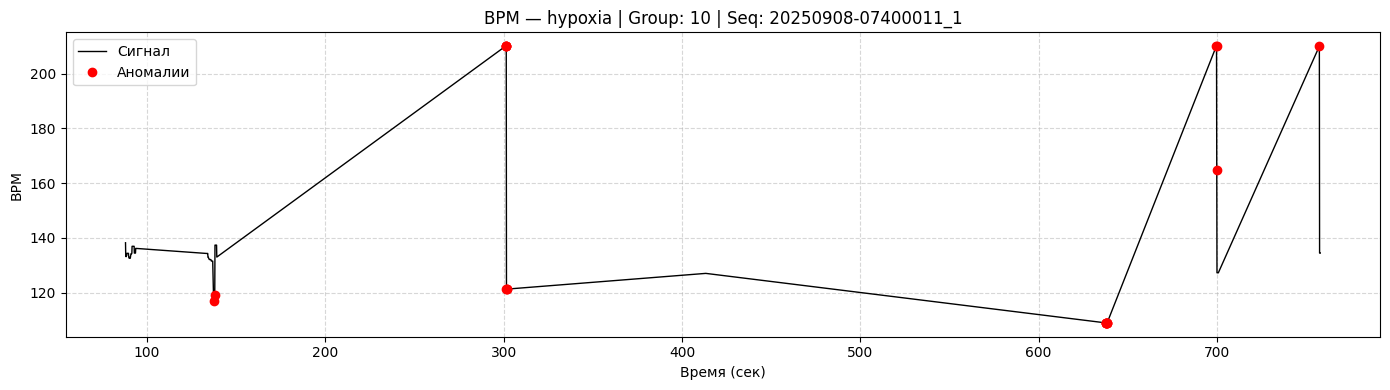

hypoxia / 10 / 20250908-07400012_1
skip: hypoxia / 10 / 20250908-07400012_1
hypoxia / 10 / 20250908-07400013_1
skip: hypoxia / 10 / 20250908-07400013_1
hypoxia / 10 / 20250908-07400014_1
skip: hypoxia / 10 / 20250908-07400014_1
hypoxia / 10 / 20250908-07400016_1
skip: hypoxia / 10 / 20250908-07400016_1
hypoxia / 10 / 20250908-07400017_1
  Точек: 1343, Аномалий: 40, Время: 0.25 мс


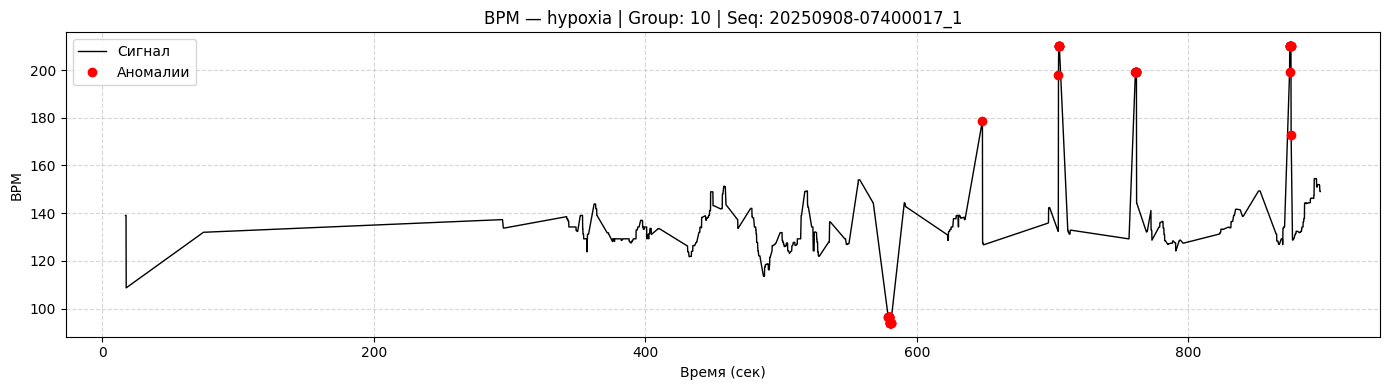

hypoxia / 10 / 20250908-07400018_1
  Точек: 2320, Аномалий: 18, Время: 0.28 мс


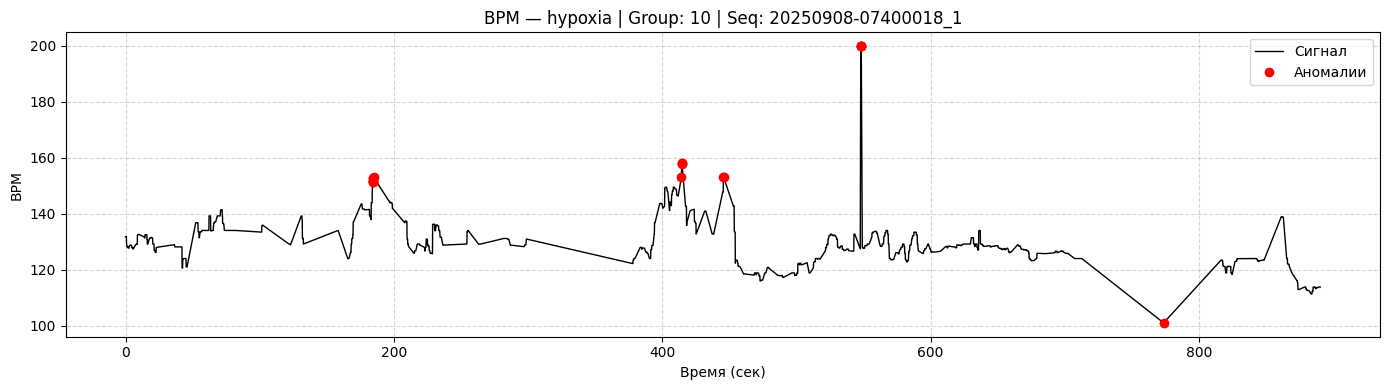

hypoxia / 10 / 20250908-07400019_1
  Точек: 1640, Аномалий: 55, Время: 0.60 мс


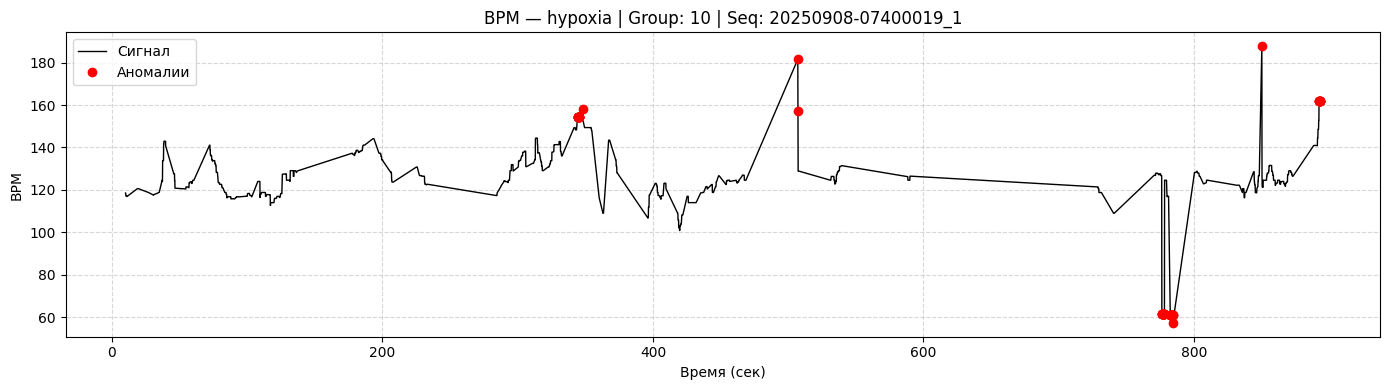

hypoxia / 10 / 20250908-07400020_1
  Точек: 2895, Аномалий: 185, Время: 0.31 мс


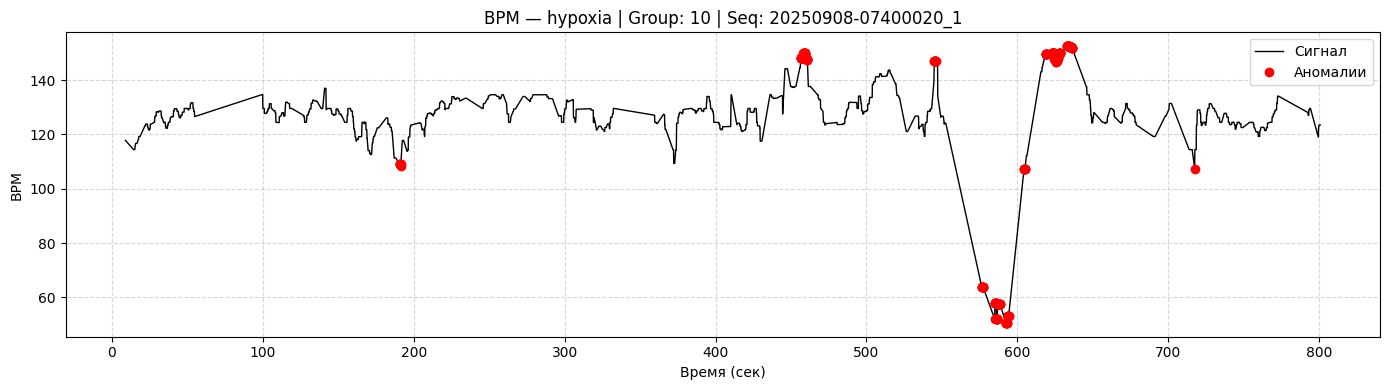

hypoxia / 10 / 20250908-07400021_1
  Точек: 2682, Аномалий: 348, Время: 0.23 мс


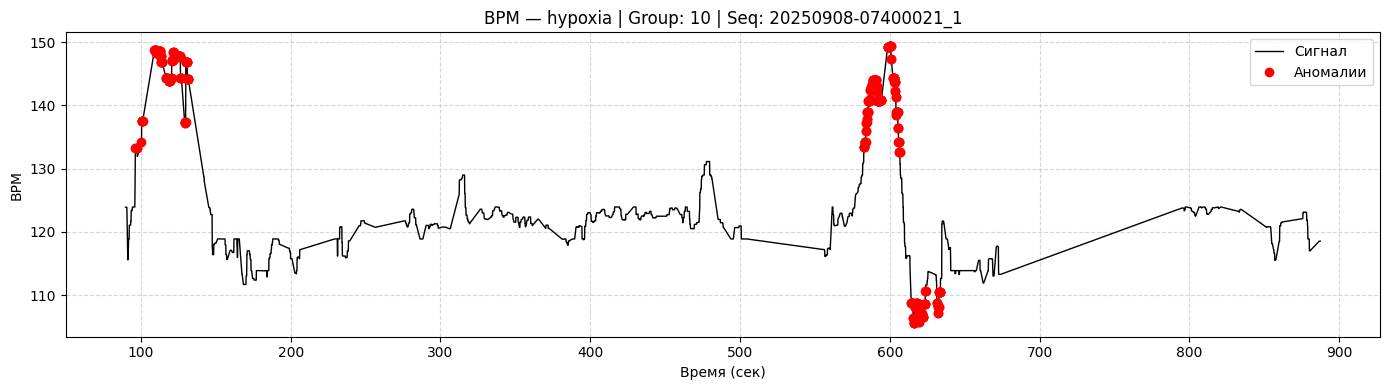

hypoxia / 10 / 20250908-07400022_1
  Точек: 3345, Аномалий: 193, Время: 0.36 мс


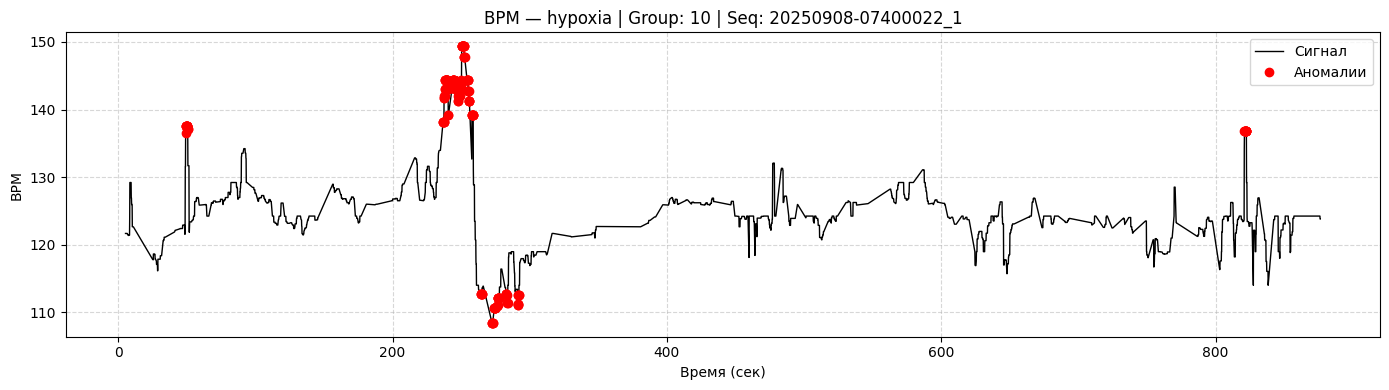

hypoxia / 10 / 20250908-07400023_1
  Точек: 3194, Аномалий: 29, Время: 0.32 мс


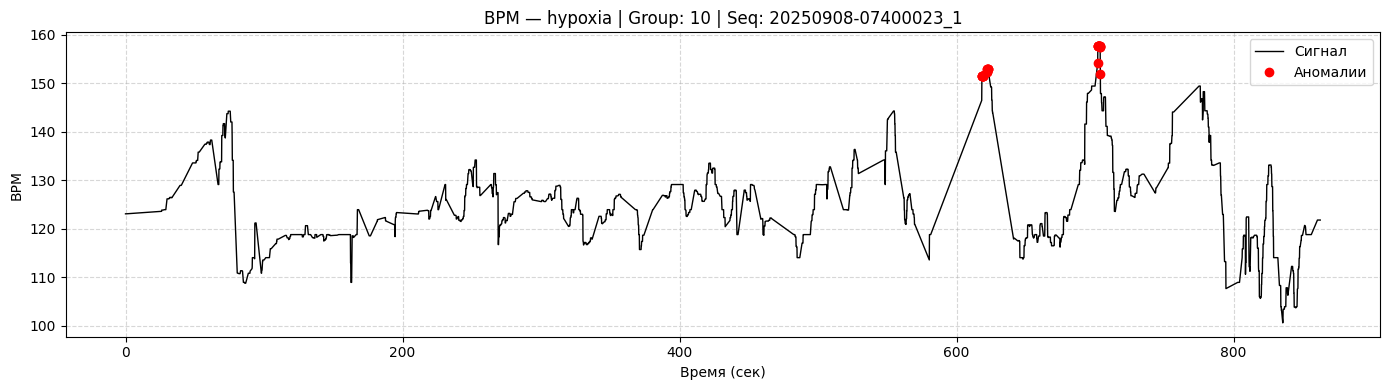

hypoxia / 10 / 20250908-07400024_1
  Точек: 2744, Аномалий: 0, Время: 0.31 мс


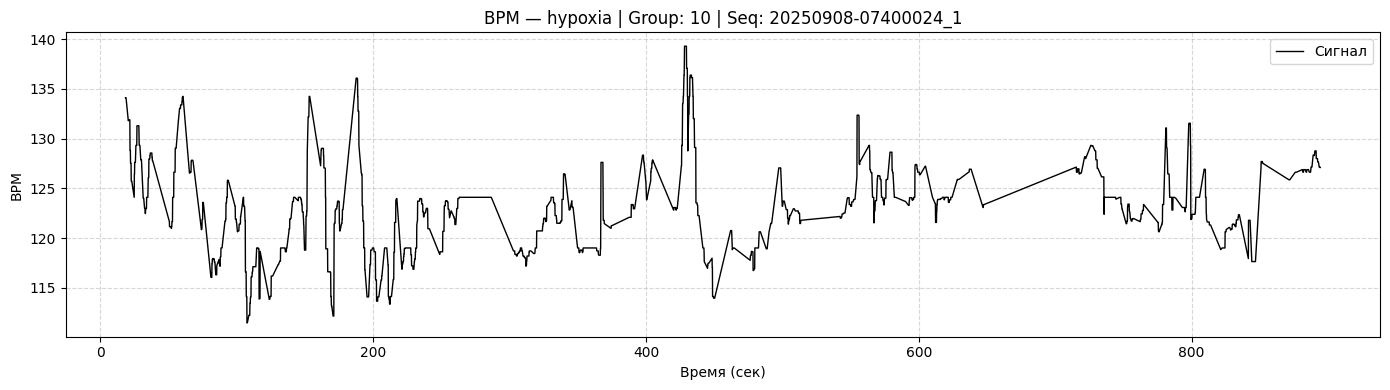

hypoxia / 10 / 20250908-07400025_1
  Точек: 2493, Аномалий: 526, Время: 0.38 мс


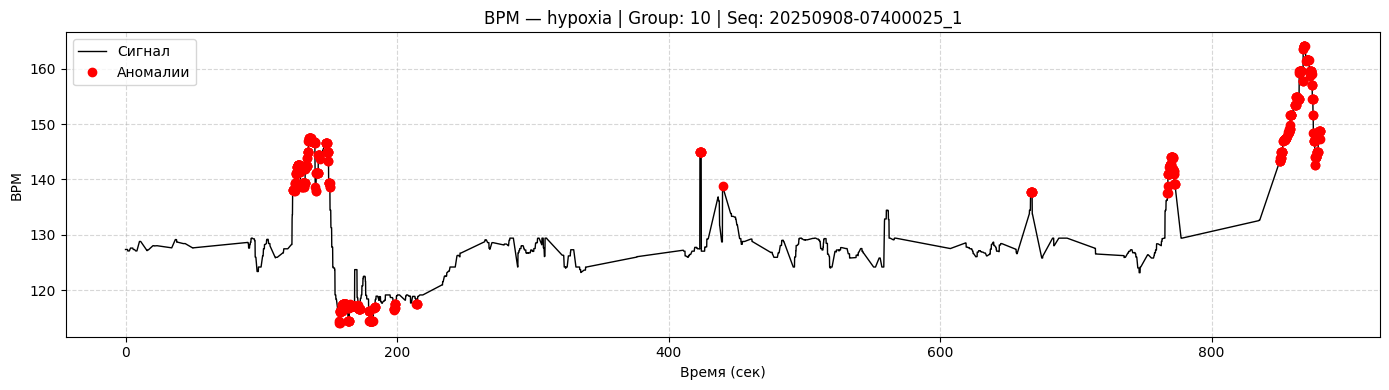

hypoxia / 10 / 20250908-07400026_1
  Точек: 3088, Аномалий: 109, Время: 0.38 мс


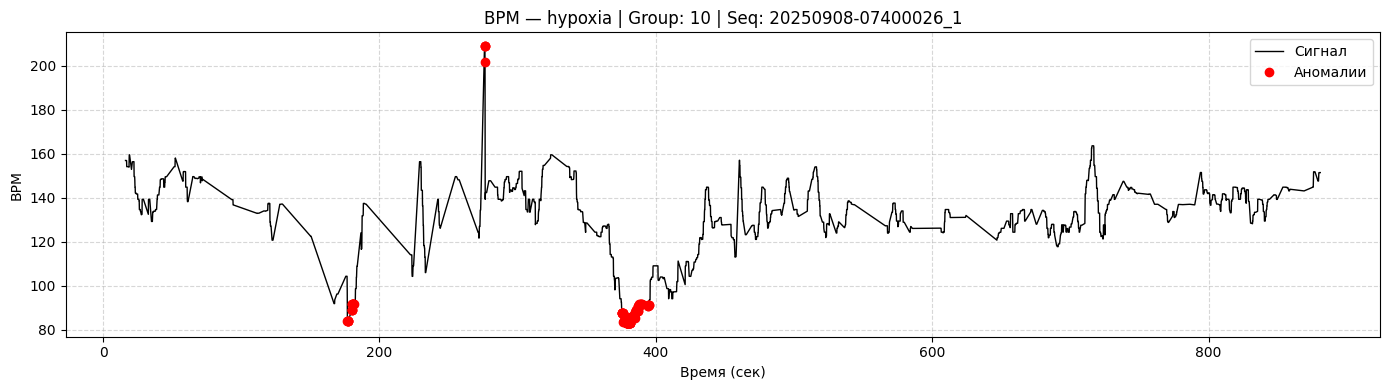

hypoxia / 10 / 20250908-07400027_1
  Точек: 976, Аномалий: 12, Время: 0.40 мс


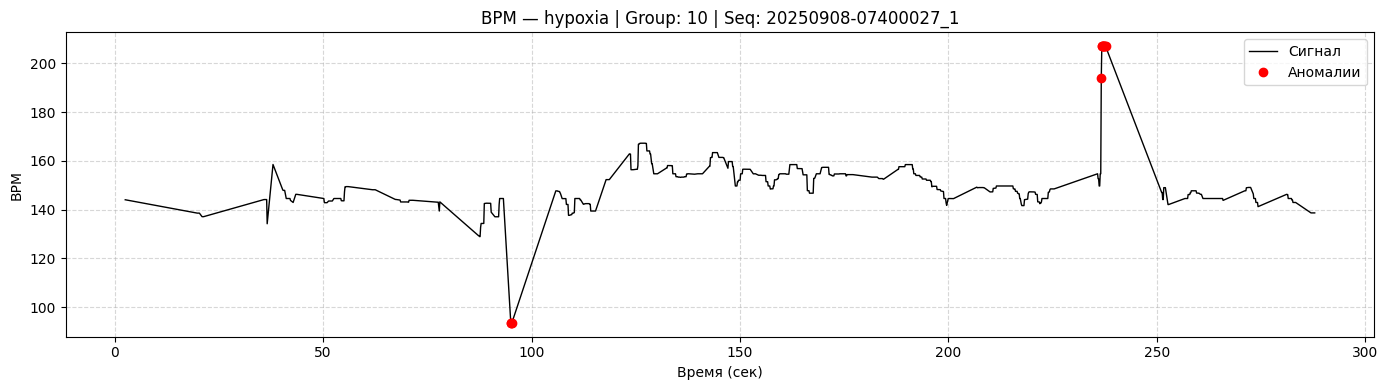

hypoxia / 10 / 20250908-07400027_3
  Точек: 2160, Аномалий: 37, Время: 0.33 мс


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

SIGNAL_COLUMN = 'bpm'
HEAD_N = 6000

grouped = df.groupby(['group_id', 'sequence_id', 'target'])

def detect_anomalies_mad(x, threshold=3.5):
    """Аномалии через robust z-score (MAD)"""
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    if mad == 0:
        return np.array([], dtype=int)
    robust_z = 0.6745 * (x - median) / mad
    return np.where(np.abs(robust_z) > threshold)[0]

for (group_id, seq_id, target), sub_df in grouped:
    print(f"{target} / {group_id} / {seq_id}")
    
    sub_df = sub_df.sort_values('timestamp').reset_index(drop=True)
    sub_df = sub_df.head(HEAD_N)
    
    x = sub_df[SIGNAL_COLUMN].values
    t = sub_df['timestamp'].values
    
    if len(x) < 100:
        print(f"skip: {target} / {group_id} / {seq_id}")
        continue
    
    start_time = time.time()
    
    anomalies = detect_anomalies_mad(x, threshold=3.5)
    
    elapsed = time.time() - start_time
    
    print(f"  Точек: {len(x)}, Аномалий: {len(anomalies)}, Время: {elapsed*1000:.2f} мс")
    
    plt.figure(figsize=(14, 4))
    plt.plot(t, x, label='Сигнал', linewidth=1, color='black')
    if len(anomalies) > 0:
        plt.plot(t[anomalies], x[anomalies], 'ro', label='Аномалии', markersize=6)
    plt.title(f'{SIGNAL_COLUMN.upper()} — {target} | Group: {group_id} | Seq: {seq_id}')
    plt.xlabel('Время (сек)')
    plt.ylabel(SIGNAL_COLUMN.upper())
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()